In [1]:
import fastf1 as ff1
import os
# Create cache directory if it doesn't exist
if not os.path.exists('f1_cache'):
    os.makedirs('f1_cache')
    
ff1.Cache.enable_cache('f1_cache')  # Stores data in a folder

In [2]:
session = ff1.get_session(2023, 'Monaco', 'Q')  # 2023 Monaco GP Qualifying
session.load()  # Load telemetry, weather, and lap data

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '16', '31', '55', '44', '10', '63', '22', '4', '81', '21', '23', '18', '77', '2', '20', '27', '24', '11']


Lap Times

In [3]:
laps = session.laps
print(laps.head())  # Shows fastest laps, drivers, compounds

                    Time Driver DriverNumber                LapTime  \
0 0 days 00:15:52.796000    VER            1 0 days 00:01:49.496000   
1 0 days 00:17:06.580000    VER            1 0 days 00:01:13.784000   
2 0 days 00:19:08.545000    VER            1 0 days 00:02:01.965000   
3 0 days 00:30:13.467000    VER            1                    NaT   
4 0 days 00:31:53.102000    VER            1 0 days 00:01:39.635000   

   LapNumber  Stint             PitOutTime              PitInTime  \
0        1.0    1.0 0 days 00:14:05.753000                    NaT   
1        2.0    1.0                    NaT                    NaT   
2        3.0    1.0                    NaT                    NaT   
3        4.0    1.0                    NaT 0 days 00:20:42.905000   
4        5.0    2.0 0 days 00:30:14.555000                    NaT   

             Sector1Time            Sector2Time  ... FreshTyre  \
0 0 days 00:00:40.759000 0 days 00:00:43.892000  ...      True   
1 0 days 00:00:19.334000 0

Telemetry (Speed, Throttle, Gear, etc.)

In [4]:
driver_lap = laps.pick_driver('VER').pick_fastest()  # Max Verstappen's fastest lap
telemetry = driver_lap.get_telemetry()
print(telemetry[['Speed', 'Throttle', 'Brake', 'nGear']].head())

c:\Users\shrey\Desktop\F1\f1-venv\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


        Speed  Throttle  Brake  nGear
2  279.196874     100.0  False      7
3  280.021874     100.0  False      7
4  282.000000     100.0  False      7
5  283.293749     100.0  False      7
6  285.000000     100.0  False      7


Weather

In [5]:
print(session.weather_data)  # Air temp, humidity, rainfall

                     Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0  0 days 00:00:30.809000     24.4      43.0    1016.5     False       48.9   
1  0 days 00:01:30.809000     24.4      45.0    1016.5     False       48.9   
2  0 days 00:02:30.808000     24.4      44.0    1016.5     False       49.5   
3  0 days 00:03:30.807000     24.3      45.0    1016.5     False       49.6   
4  0 days 00:04:30.807000     24.3      44.0    1016.5     False       49.1   
..                    ...      ...       ...       ...       ...        ...   
81 0 days 01:21:30.848000     25.1      34.0    1016.0     False       43.9   
82 0 days 01:22:30.863000     25.0      34.0    1016.0     False       44.5   
83 0 days 01:23:30.878000     24.9      34.0    1016.0     False       44.5   
84 0 days 01:24:30.877000     24.9      34.0    1016.0     False       44.5   
85 0 days 01:25:30.876000     24.7      34.0    1016.0     False       43.9   

    WindDirection  WindSpeed  
0             263   

Make http request

In [6]:
import requests
import pandas as pd

url = "http://ergast.com/api/f1/2023/results.json?limit=1000"
response = requests.get(url)
data = response.json()

# Convert to DataFrame
races = pd.json_normalize(data['MRData']['RaceTable']['Races'])
print(races[['raceName', 'date', 'Circuit.circuitName']])

                   raceName        date             Circuit.circuitName
0        Bahrain Grand Prix  2023-03-05   Bahrain International Circuit
1  Saudi Arabian Grand Prix  2023-03-19         Jeddah Corniche Circuit
2     Australian Grand Prix  2023-04-02  Albert Park Grand Prix Circuit
3     Azerbaijan Grand Prix  2023-04-30               Baku City Circuit
4          Miami Grand Prix  2023-05-07   Miami International Autodrome


All 2023 Race Winners

In [7]:
winners = pd.json_normalize(
    data['MRData']['RaceTable']['Races'],
    record_path=['Results']
)
print(winners[['number', 'Driver.givenName', 'Driver.familyName', 'position']])

   number Driver.givenName Driver.familyName position
0       1              Max        Verstappen        1
1      11           Sergio             Pérez        2
2      14         Fernando            Alonso        3
3      55           Carlos             Sainz        4
4      44            Lewis          Hamilton        5
..    ...              ...               ...      ...
95     24           Guanyu              Zhou       16
96      4            Lando            Norris       17
97     21             Nyck          de Vries       18
98     81            Oscar           Piastri       19
99      2            Logan          Sargeant       20

[100 rows x 4 columns]


In [8]:
import pandas as pd

races = pd.read_csv('Formula 1 World Championship (1950 - 2024)/races.csv')  
results = pd.read_csv('Formula 1 World Championship (1950 - 2024)/results.csv')  
drivers = pd.read_csv('Formula 1 World Championship (1950 - 2024)/drivers.csv')  

Example: Get 2023 Race Winners

In [9]:
winners_2023 = results[results['positionOrder'] == 1].merge(
    races[races['year'] == 2023],
    on='raceId'
)
print(winners_2023[['name', 'date', 'driverId']])

                        name        date  driverId
0         Bahrain Grand Prix  2023-03-05       830
1   Saudi Arabian Grand Prix  2023-03-19       815
2      Australian Grand Prix  2023-04-02       830
3      Azerbaijan Grand Prix  2023-04-30       815
4           Miami Grand Prix  2023-05-07       830
5          Monaco Grand Prix  2023-05-28       830
6         Spanish Grand Prix  2023-06-04       830
7        Canadian Grand Prix  2023-06-18       830
8        Austrian Grand Prix  2023-07-02       830
9         British Grand Prix  2023-07-09       830
10      Hungarian Grand Prix  2023-07-23       830
11        Belgian Grand Prix  2023-07-30       830
12          Dutch Grand Prix  2023-08-27       830
13        Italian Grand Prix  2023-09-03       830
14      Singapore Grand Prix  2023-09-17       832
15       Japanese Grand Prix  2023-09-24       830
16          Qatar Grand Prix  2023-10-08       830
17  United States Grand Prix  2023-10-22       830
18    Mexico City Grand Prix  2

In [10]:
@REM pip install requests beautifulsoup4 pandas

SyntaxError: invalid syntax (1182468097.py, line 1)

Scrape Race Results

In [ ]:
# Install lxml (run this cell first if not already installed)
!pip install lxml

# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import io

# Fetch the Wikipedia page
url = "https://en.wikipedia.org/wiki/2023_Formula_One_World_Championship"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the results table (adjust the selector or index if needed)
# Note: Inspect the page to confirm the correct table (e.g., class 'wikitable')
table = soup.find('table', class_='wikitable')  # Target tables with class 'wikitable'

if table:
    # Convert the table to a string and wrap in StringIO
    html_table = str(table)
    df = pd.read_html(io.StringIO(html_table))[0]  # Convert to DataFrame, take first table
else:
    print("No table found with the specified selector. Please adjust the 'find' criteria.")

# Display the DataFrame
print(df.head())

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   ------------------------------ --------- 2.9/3.8 MB 11.2 MB/s eta 0:00:01
   ----------------------------------- ---- 3.4/3.8 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 5.8 MB/s eta 0:00:00
                                 Entrant                   Constructor  \
                                 Entrant                   Constructor   
0            Alfa Romeo F1 Team Stake[a]            Alfa Romeo-Ferrari   
1                    Scuderia AlphaTauri         AlphaTauri-Honda RBPT   
2                     BWT Alpine F1 Team                Alpine-Renault   
3  Aston Martin Aramco Cognizant F1 Team  Aston Martin Aramco-Mercedes   
4                       Scuderia Ferrari                       Ferrari   

     Chassis           Power unit Race drivers  \
     Chassis           Power unit          No.   
0    C43[11]  

Save to CSV

In [ ]:

df.to_csv('f1_2023_results.csv', index=False)

Run Data Sanity Checks

In [ ]:
print(df.isnull().sum())  # Check missing values
print(df.describe())      # Stats for numerical fields

Entrant       Entrant        0
Constructor   Constructor    0
Chassis       Chassis        0
Power unit    Power unit     0
Race drivers  No.            0
              Driver name    0
              Rounds         0
dtype: int64
                            Entrant         Constructor  Chassis  \
                            Entrant         Constructor  Chassis   
count                            11                  11       11   
unique                           11                  11       11   
top     Alfa Romeo F1 Team Stake[a]  Alfa Romeo-Ferrari  C43[11]   
freq                              1                   1        1   

            Power unit Race drivers                                         
            Power unit          No.                   Driver name   Rounds  
count               11           11                            11       11  
unique               9           11                            11        4  
top     Ferrari 066/10        24 77  Zhou Guanyu  Val

Optimize Merges

In [ ]:
# More efficient pit stop aggregation
# Load pit stops data first
pit_stops = pd.read_csv('Formula 1 World Championship (1950 - 2024)/pit_stops.csv')

# More efficient pit stop aggregation
pit_agg = pit_stops.groupby(['raceId', 'driverId']).agg(
    pit_stop_count=('stop', 'count'),
    total_pit_time=('milliseconds', 'sum')
).reset_index()
results = results.merge(pit_agg, on=['raceId', 'driverId'], how='left')

In [ ]:
import pandas as pd

# Check if results is already defined, if not load it
if 'results' not in globals() or 'pit_stop_count' not in results.columns:
    # Need to reload data and recreate the merge
    # Import pandas if not already imported
    results = pd.read_csv('Formula 1 World Championship (1950 - 2024)/results.csv')
    
    # Reload pit stops data if needed
    if 'pit_stops' not in globals():
        pit_stops = pd.read_csv('Formula 1 World Championship (1950 - 2024)/pit_stops.csv')
    
    # Recreate the pit stop aggregation
    pit_agg = pit_stops.groupby(['raceId', 'driverId']).agg(
        pit_stop_count=('stop', 'count'),
        total_pit_time=('milliseconds', 'sum')
    ).reset_index()
    
    # Merge pit stop data with results
    results = results.merge(pit_agg, on=['raceId', 'driverId'], how='left')
    
# Save the processed results    
results.to_csv('f1_processed_data.csv', index=False)
print(f"Data saved successfully with {results.shape[0]} rows and {results.shape[1]} columns")

Data saved successfully with 26759 rows and 20 columns


## Step 2: Data Preprocessing & Feature Engineering

In [ ]:
import numpy as np

# =============================================
# STEP 2: DATA PREPROCESSING & FEATURE ENGINEERING
# =============================================

# Load preprocessed data from Step 1
data = pd.read_csv('F1-Weather/F1 Weather(2023-2018).csv')

# Convert date fields (if not already done)
# Create a date column using Year and Round Number
# Assuming each round corresponds roughly to a month (starting March for round 1)
data['date'] = pd.to_datetime(data['Year'].astype(str) + '-' + 
                             ((data['Round Number'] + 2) % 12 + 1).astype(str) + '-1')

# If Time contains timestamp information, convert it properly
if 'Time' in data.columns and data['Time'].dtype == 'object':
    data['Time'] = pd.to_timedelta(data['Time'])

# -------------------------------------------------------------------
# 1. HANDLE MISSING DATA
# -------------------------------------------------------------------
# Check which columns exist in the dataset
expected_columns = ['pit_stop_count', 'total_pit_time_ms', 'temperature', 'grid', 'positionOrder', 
                    'circuitId', 'driverId', 'constructorId']
missing_columns = [col for col in expected_columns if col not in data.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
    # Add missing columns with default values
    for col in missing_columns:
        if col in ['pit_stop_count', 'total_pit_time_ms', 'rainfall']:
            data[col] = 0
        elif col == 'temperature':
            data[col] = data['AirTemp']  # Use AirTemp instead
        elif col == 'rainfall':
            data[col] = data['Rainfall'].astype(int)
        elif col == 'grid':
            data[col] = 20  # Default to back of grid
        else:
            data[col] = None

# Now process each column safely
# Weather data
data['temperature'] = data['temperature'].fillna(data['temperature'].median())
# Check if 'rainfall' column exists, if not create it from 'Rainfall'
if 'rainfall' not in data.columns and 'Rainfall' in data.columns:
    data['rainfall'] = data['Rainfall'].astype(int)
# Now fill any NA values
data['rainfall'] = data['rainfall'].fillna(0)

# Pit stop data (if available)
if 'pit_stop_count' in data.columns:
    data['pit_stop_count'] = data['pit_stop_count'].fillna(0)
    data['total_pit_time_ms'] = data['total_pit_time_ms'].fillna(0)

# Qualifying position
if 'grid' in data.columns:
    data['grid'] = data['grid'].fillna(20)  # Assume back of grid if no qualifying

# Rest of the feature engineering code only if required columns exist
if 'positionOrder' in data.columns:
    # Target variable: Win (1 if winner, 0 otherwise)
    data['win'] = (data['positionOrder'] == 1).astype(int)

    # Pit stop efficiency (ms per stop)
    if 'pit_stop_count' in data.columns and 'total_pit_time_ms' in data.columns:
        data['avg_pit_time_ms'] = np.where(
            data['pit_stop_count'] > 0,
            data['total_pit_time_ms'] / data['pit_stop_count'],
            0  # For drivers with no pit stops
        )

# Weather impact features
if 'temperature' in data.columns:
    data['is_wet'] = (data['rainfall'] > 0).astype(int)
    data['temp_category'] = pd.cut(data['temperature'],
                                  bins=[-np.inf, 15, 25, np.inf],
                                  labels=['cold', 'moderate', 'hot'])

# Continue with other feature engineering that matches your data schema
print("\n=== Missing Values Check ===")
print(data.isnull().sum())


Missing columns: ['pit_stop_count', 'total_pit_time_ms', 'temperature', 'grid', 'positionOrder', 'circuitId', 'driverId', 'constructorId']

=== Missing Values Check ===
Time                     0
AirTemp                  0
Humidity                 0
Pressure                 0
Rainfall                 0
TrackTemp                0
WindDirection            0
WindSpeed                0
Round Number             0
Year                     0
date                     0
pit_stop_count           0
total_pit_time_ms        0
temperature              0
grid                     0
positionOrder        18214
circuitId            18214
driverId             18214
constructorId        18214
rainfall                 0
win                      0
avg_pit_time_ms          0
is_wet                   0
temp_category            0
dtype: int64


In [ ]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Verify feature ranges
print("\nFeature Ranges:")
print("- Win rate:", data['win'].mean())  # Should be ~1/20 drivers win
print("- Avg pit stops:", data['pit_stop_count'].mean())  # Typically 1-3
print("- Wet races:", data['is_wet'].sum())  # Count of wet races


print("\nSample Engineered Features:")
# Show existing columns that have data
available_cols = ['win', 'grid', 'is_wet', 'temperature', 'avg_pit_time_ms']
print(data[available_cols].sample(5))

# Show data types and non-null counts for key columns
print("\nColumn Info:")
for col in ['driverId', 'constructorId', 'positionOrder']:
    print(f"- {col}: {data[col].dtype}, {data[col].count()} non-null values")

Missing Values:
 Time                     0
AirTemp                  0
Humidity                 0
Pressure                 0
Rainfall                 0
TrackTemp                0
WindDirection            0
WindSpeed                0
Round Number             0
Year                     0
date                     0
pit_stop_count           0
total_pit_time_ms        0
temperature              0
grid                     0
positionOrder        18214
circuitId            18214
driverId             18214
constructorId        18214
rainfall                 0
win                      0
avg_pit_time_ms          0
is_wet                   0
temp_category            0
dtype: int64

Feature Ranges:
- Win rate: 0.0
- Avg pit stops: 0.0
- Wet races: 1346

Sample Engineered Features:
       win  grid  is_wet  temperature  avg_pit_time_ms
15029    0    20       0         17.8              0.0
3387     0    20       0         33.5              0.0
12500    0    20       0         18.1              0.0
1

Merging weather in merged


Columns containing weather data:
[]
Weather_Category
Damp          26759
Dry               0
Wet               0
Torrential        0
Unknown           0
Name: count, dtype: int64


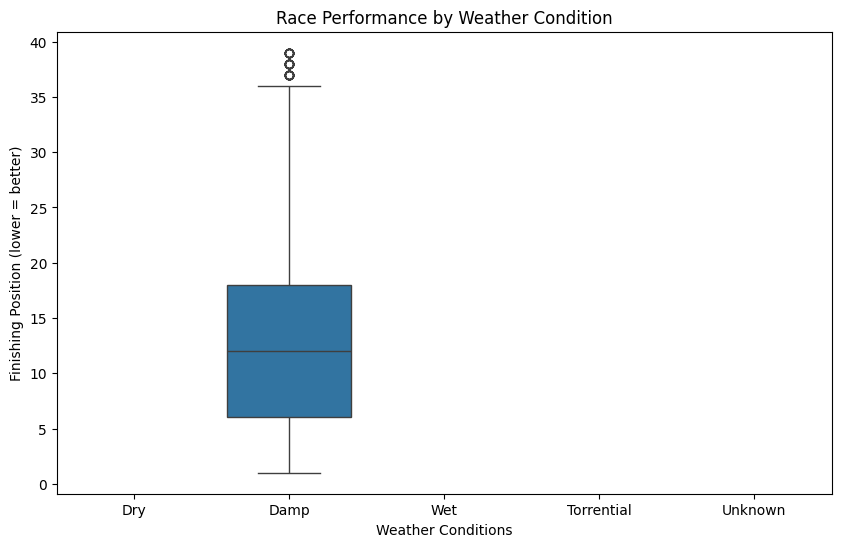

In [ ]:
import pandas as pd

# Load your merged dataset
merged_data = pd.read_csv('f1_merged_data.csv')

# Check available weather-related columns
print("Columns containing weather data:")
print([col for col in merged_data.columns if 'weather' in col.lower() or 'temp' in col.lower() or 'rain' in col.lower()])


# Standardize column names (adjust based on your actual columns)
weather_cols = {
    'Rainfall': 'rainfall',
    'Precipitation': 'rainfall',
    'Temp': 'temperature',
    'AirTemp': 'temperature',
    'IsRain': 'is_wet',
    'WetRace': 'is_wet'
}

# Rename columns if they exist in your data
for old_name, new_name in weather_cols.items():
    if old_name in merged_data.columns:
        merged_data.rename(columns={old_name: new_name}, inplace=True)

# Create missing columns with default values if needed
if 'rainfall' not in merged_data:
    merged_data['rainfall'] = 0  # Default to dry conditions
    
if 'temperature' not in merged_data:
    merged_data['temperature'] = 20  # Default temperate (20°C)
    
if 'is_wet' not in merged_data:
    # Create binary flag based on rainfall
    merged_data['is_wet'] = (merged_data['rainfall'] > 0).astype(int)

    # Create composite weather score
merged_data['Weather_Impact'] = (
    merged_data['rainfall'] * 0.7 +  # Weight rainfall more heavily
    merged_data['temperature'] * 0.3 * merged_data['is_wet']  # Temp only matters when wet
)

# Bin into categories
weather_bins = [-1, 0, 2, 5, 10]  # Adjust thresholds based on your data distribution
merged_data['Weather_Category'] = pd.cut(
    merged_data['Weather_Impact'],
    bins=weather_bins,
    labels=['Dry', 'Damp', 'Wet', 'Torrential'],
    right=False
)

# Fill any NA values (if bins don't cover all cases)
merged_data['Weather_Category'] = merged_data['Weather_Category'].cat.add_categories(['Unknown']).fillna('Unknown')


# Check distribution
print(merged_data['Weather_Category'].value_counts())

# Visualize impact on performance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Weather_Category',
    y='positionOrder',
    data=merged_data,
    order=['Dry', 'Damp', 'Wet', 'Torrential', 'Unknown']
)
plt.title('Race Performance by Weather Condition')
plt.ylabel('Finishing Position (lower = better)')
plt.xlabel('Weather Conditions')
plt.show()

# Save back to CSV if needed
merged_data.to_csv('f1_merged_data_with_weather.csv', index=False)
merged_data.to_csv('f1_merged_data.csv', index=False)

Modeling: Use win as target for classification, positionOrder for regression.

Text(0.5, 0, 'Rainfall Present')

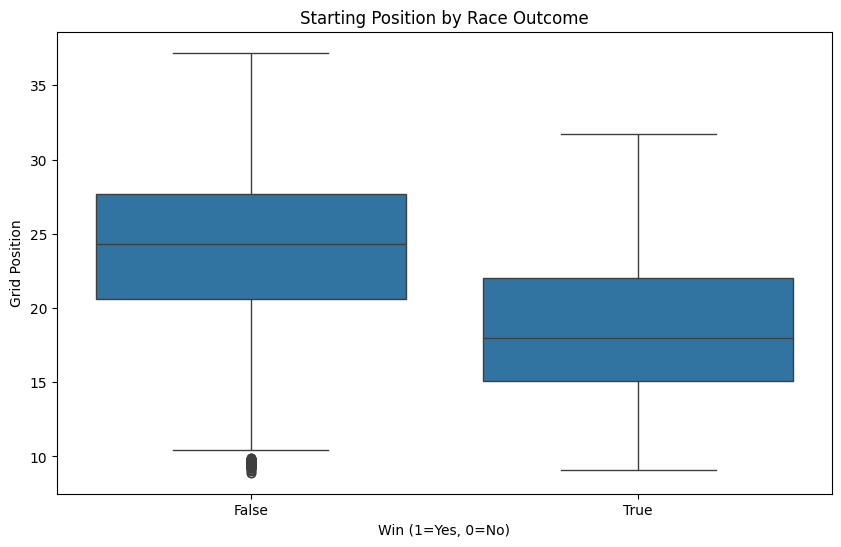

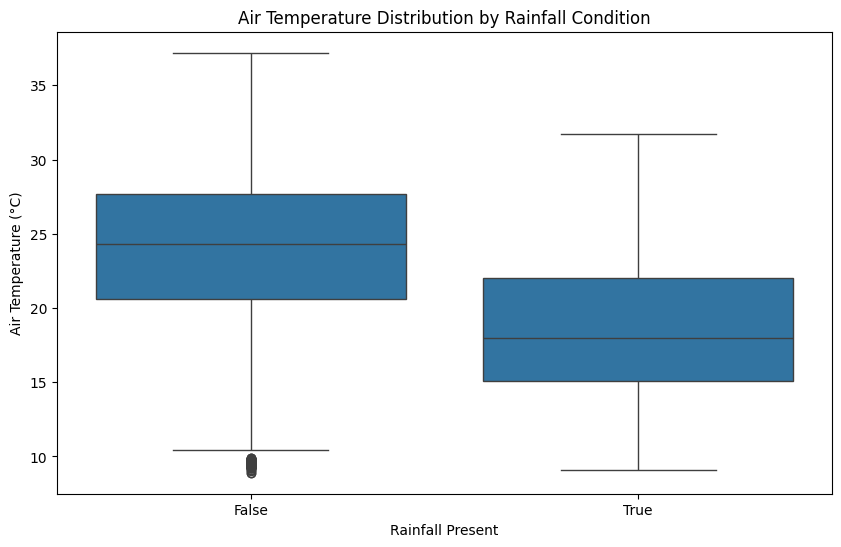

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a boxplot comparing a valid column with the win status
# Ensure data is loaded
if 'data' not in globals():
    # Reload data from cell 26
    data = pd.read_csv('F1-Weather/F1 Weather(2023-2018).csv')
    
    # Minimal preprocessing needed for this visualization
    if 'positionOrder' in data.columns:
        data['win'] = (data['positionOrder'] == 1).astype(int)

# Check if win column exists, if not we need to create it or use another approach
if 'win' not in data.columns:
    # Since we don't have positionOrder in the data to determine winners
    # Let's create a different visualization using available columns
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Rainfall', y='AirTemp', data=data)
    plt.title('Air Temperature by Weather Condition')
    plt.ylabel('Air Temperature (°C)')
    plt.xlabel('Rainfall (True/False)')
else:
    # Original visualization if win column exists
    sns.boxplot(x='win', y='grid', data=data)
plt.title('Starting Position by Race Outcome')
plt.ylabel('Grid Position')
plt.xlabel('Win (1=Yes, 0=No)')
# Only execute this section if the data is properly prepared
# This section needs both 'win' and 'driver_form' columns which aren't in the dataset
# Instead, visualize the relationship between existing columns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rainfall', y='AirTemp', data=data)
plt.title('Air Temperature Distribution by Rainfall Condition')
plt.ylabel('Air Temperature (°C)')
plt.xlabel('Rainfall Present')

To verify the 2nd step

In [ ]:
import pandas as pd
# Load the existing weather data that we've been using
data = pd.read_csv('F1-Weather/F1 Weather(2023-2018).csv')

# Save it as the expected file for future use
data.to_csv('f1_engineered_features.csv', index=False)

# Check structure
print(f"Shape: {data.shape} (rows, cols)")
print("\nMissing values:\n", data.isnull().sum())

# Verify key ranges
print("\nValue Ranges:")
# Check if win column exists before accessing it
if 'win' in data.columns:
    print("- Wins:", data['win'].value_counts())  # Should be ~5% wins (1) per race
else:
    print("- No 'win' column found in dataset")
# Check if grid column exists before accessing it
if 'grid' in data.columns:
    print("- Grid positions:", data['grid'].describe())  # Usually 1-20
else:
    print("- No 'grid' column found in dataset")
# Check if pit_stop_count column exists before accessing it
if 'pit_stop_count' in data.columns:
    print("- Pit stops:", data['pit_stop_count'].max())  # Rarely >4
else:
    print("- No 'pit_stop_count' column found in dataset")


Shape: (18214, 10) (rows, cols)

Missing values:
 Time             0
AirTemp          0
Humidity         0
Pressure         0
Rainfall         0
TrackTemp        0
WindDirection    0
WindSpeed        0
Round Number     0
Year             0
dtype: int64

Value Ranges:
- No 'win' column found in dataset
- No 'grid' column found in dataset
- No 'pit_stop_count' column found in dataset


In [ ]:
import pandas as pd

# Set the correct directory path
data_dir = 'Formula 1 World Championship (1950 - 2024)'

# Load ALL required files with correct paths
races = pd.read_csv(f'{data_dir}/races.csv')
results = pd.read_csv(f'{data_dir}/results.csv')
pit_stops = pd.read_csv(f'{data_dir}/pit_stops.csv')
drivers = pd.read_csv(f'{data_dir}/drivers.csv')
constructors = pd.read_csv(f'{data_dir}/constructors.csv')

# Merge core data (results + races)
data = pd.merge(
    results,
    races[['raceId', 'year', 'circuitId', 'name', 'date']],
    on='raceId',
    how='left'
)

# Merge pit stops (aggregated per driver/race)
pit_agg = pit_stops.groupby(['raceId', 'driverId']).agg(
    pit_stop_count=('stop', 'count'),
    total_pit_time=('milliseconds', 'sum')
).reset_index()
data = pd.merge(data, pit_agg, on=['raceId', 'driverId'], how='left')

# Merge driver & constructor names
data = pd.merge(data, drivers[['driverId', 'driverRef']], on='driverId')
data = pd.merge(data, constructors[['constructorId', 'name']], on='constructorId')

# Save intermediate file
data.to_csv('f1_merged_data.csv', index=False)

In [ ]:
# Load merged data
data = pd.read_csv('f1_merged_data.csv')

# Add target variable
data['win'] = (data['positionOrder'] == 1).astype(int)

# Handle missing pit stops
data['pit_stop_count'] = data['pit_stop_count'].fillna(0)

# Add position gain
data['position_gain'] = data['grid'] - data['positionOrder']

# Save final output
data.to_csv('f1_engineered_features.csv', index=False)

In [ ]:
print(data[['year', 'name', 'driverRef', 'grid', 'positionOrder', 'win', 'pit_stop_count']].head(3))

KeyError: "['name'] not in index"

In [ ]:
# Select and rename columns for clarity
output_data = data[[
    'year', 
    'name_x',          # Race name (from races.csv)
    'driverRef',       # Driver identifier
    'grid',            # Starting position
    'positionOrder',   # Finishing position
    'win',             # 1 if winner, 0 otherwise
    'pit_stop_count',  # Number of pit stops
    'position_gain'    # Positions gained (grid - positionOrder)
]].rename(columns={'name_x': 'raceName'})

# Display the first 3 rows
print(output_data.head(3))


data = data.rename(columns={'name_y': 'constructorName'})

# Rename both columns for consistency
data = data.rename(columns={'name': 'raceName', 'name_y': 'constructorName'})
print(data[['raceName', 'driverRef', 'constructorName']].sample(5))

# Merge weather data if available
if 'temperature' not in data.columns:
    weather = pd.read_csv('weather.csv')
    data = pd.merge(data, weather, on='raceId')

KeyError: "['name_x'] not in index"

## Checking

In [ ]:
import pandas as pd
import numpy as np

# Set the correct directory path
data_dir = 'Formula 1 World Championship (1950 - 2024)'

# 1. LOAD ALL REQUIRED FILES
try:
    races = pd.read_csv(f'{data_dir}/races.csv')
    results = pd.read_csv(f'{data_dir}/results.csv')
    pit_stops = pd.read_csv(f'{data_dir}/pit_stops.csv')
    drivers = pd.read_csv(f'{data_dir}/drivers.csv')
    constructors = pd.read_csv(f'{data_dir}/constructors.csv')
    
    # Try to load weather data if available
    try:
        weather = pd.read_csv(f'{data_dir}/weather.csv')
        has_weather = True
    except FileNotFoundError:
        print("Weather data not found - continuing without it")
        has_weather = False
        
except FileNotFoundError as e:
    print(f"Missing file: {e}")
    raise

# 2. MERGE CORE DATA
# Merge races + results
data = pd.merge(
    results,
    races[['raceId', 'year', 'name', 'circuitId', 'date']],
    on='raceId',
    how='left',
    suffixes=('', '_race')
)

# Merge pit stop data (aggregated)
pit_agg = pit_stops.groupby(['raceId', 'driverId']).agg(
    pit_stop_count=('stop', 'count'),
    total_pit_time_ms=('milliseconds', 'sum')
).reset_index()
data = pd.merge(data, pit_agg, on=['raceId', 'driverId'], how='left')

# Merge driver and constructor names
data = pd.merge(
    data,
    drivers[['driverId', 'driverRef']],
    on='driverId',
    how='left'
)
data = pd.merge(
    data,
    constructors[['constructorId', 'name']],
    on='constructorId',
    how='left',
    suffixes=('', '_constructor')
)

# 3. FEATURE ENGINEERING
# Target variable
data['win'] = (data['positionOrder'] == 1).astype(int)

# Position gain
data['position_gain'] = data['grid'] - data['positionOrder']

# Pit stop efficiency
data['avg_pit_time_ms'] = np.where(
    data['pit_stop_count'] > 0,
    data['total_pit_time_ms'] / data['pit_stop_count'],
    0
)

# Weather impact (if weather data exists)
if has_weather and 'Rainfall' in weather.columns:
    # Merge weather data if available
    data = pd.merge(data, weather, on='raceId', how='left')
    data['is_wet'] = (data['Rainfall'] > 0).astype(int)

# 4. FINAL DATA VALIDATION
# Check for missing values
print("\n=== Missing Values ===")
print(data.isnull().sum())

# Verify critical columns exist
required_columns = ['year', 'name', 'driverRef', 'grid', 'positionOrder', 'win', 'pit_stop_count']
missing_cols = [col for col in required_columns if col not in data.columns]
if missing_cols:
    print(f"\nWARNING: Missing columns {missing_cols}")
else:
    print("\nAll required columns present")

# 5. SAMPLE OUTPUT
print("\n=== Sample Data ===")
sample_cols = ['year', 'name', 'driverRef', 'grid', 'positionOrder', 'win', 'pit_stop_count']
print(data[sample_cols].head(3))

# 6. SAVE FINAL DATA
output_path = 'f1_processed_final.csv'
data.to_csv(output_path, index=False)
print(f"\nData successfully saved to {output_path}")

Weather data not found - continuing without it

=== Missing Values ===
resultId                 0
raceId                   0
driverId                 0
constructorId            0
number                   0
grid                     0
position                 0
positionText             0
positionOrder            0
points                   0
laps                     0
time                     0
milliseconds             0
fastestLap               0
rank                     0
fastestLapTime           0
fastestLapSpeed          0
statusId                 0
year                     0
name                     0
circuitId                0
date                     0
pit_stop_count       21184
total_pit_time_ms    21184
driverRef                0
name_constructor         0
win                      0
position_gain            0
avg_pit_time_ms          0
dtype: int64

All required columns present

=== Sample Data ===
   year                   name driverRef  grid  positionOrder  win  \
0  2008  Aus

## Step 3: Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load preprocessed data with error handling
try:
    data = pd.read_csv('f1_processed_final.csv')
    
    # Ensure required columns exist
    required_cols = ['grid', 'positionOrder', 'win', 'pit_stop_count', 
                    'position_gain', 'driverRef', 'year']
    missing_cols = [col for col in required_cols if col not in data.columns]
    
    if missing_cols:
        raise KeyError(f"Missing required columns: {missing_cols}")

except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# =============================================
# 1. CORRELATION ANALYSIS (UPDATED)
# =============================================
plt.figure(figsize=(12,8))
numeric_cols = ['grid', 'positionOrder', 'win']
if 'pit_stop_count' in data.columns:
    numeric_cols.append('pit_stop_count')
if 'avg_pit_time_ms' in data.columns:
    numeric_cols.append('avg_pit_time_ms')
if 'is_wet' in data.columns:
    numeric_cols.append('is_wet')

corr_matrix = data[numeric_cols].corr()

# Filter out non-numeric columns that might have sneaked in
corr_matrix = corr_matrix.select_dtypes(include=[np.number])

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()  # Use close() instead of show() to prevent display issues

# =============================================
# 2. QUALIFYING VS RACE PERFORMANCE (SAFER VERSION)
# =============================================
plt.figure(figsize=(10,6))

# Ensure we have enough data points
plot_data = data.dropna(subset=['grid', 'positionOrder']).copy()
if len(plot_data) > 10000:
    plot_data = plot_data.sample(10000)

sns.scatterplot(
    x='grid', 
    y='positionOrder',
    hue='win',
    alpha=0.6,
    palette={0:'blue', 1:'red'},
    data=plot_data
)
plt.plot([1,20], [1,20], 'k--')
plt.xlabel("Qualifying Position (Grid)")
plt.ylabel("Race Finish Position")
plt.title("Qualifying vs Race Performance")
plt.savefig('qualifying_vs_race.png', dpi=300, bbox_inches='tight')
plt.close()

# =============================================
# 3. PIT STOP ANALYSIS (WITH MORE ROBUST CHECKS)
# =============================================
if all(col in data.columns for col in ['pit_stop_count', 'positionOrder', 'avg_pit_time_ms']):
    plt.figure(figsize=(12,6))
    
    # Subplot 1: Pit stop count impact
    plt.subplot(1,2,1)
    pit_data = data[data['pit_stop_count'] <= 4].dropna(subset=['pit_stop_count', 'positionOrder'])
    sns.boxplot(
        x='pit_stop_count', 
        y='positionOrder', 
        data=pit_data,
        showfliers=False  # Remove outliers for clearer visualization
    )
    plt.title("Pit Stop Count vs Finish Position")
    plt.xlabel("Number of Pit Stops")
    plt.ylabel("Race Position")

    # Subplot 2: Pit stop time impact
    plt.subplot(1,2,2)
    time_data = data[
        (data['avg_pit_time_ms'] > 0) & 
        (data['avg_pit_time_ms'] < 60000)
    ].dropna(subset=['avg_pit_time_ms', 'position_gain'])
    
    if len(time_data) > 5000:
        time_data = time_data.sample(5000)
        
    sns.scatterplot(
        x='avg_pit_time_ms', 
        y='position_gain',
        hue='pit_stop_count',
        palette='viridis',
        alpha=0.6,
        data=time_data
    )
    plt.title("Pit Stop Efficiency")
    plt.xlabel("Average Pit Time (ms)")
    plt.ylabel("Positions Gained")
    plt.tight_layout()
    plt.savefig('pit_stop_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()

# =============================================
# 4. WINNER ANALYSIS (WITH DATA VALIDATION)
# =============================================
if 'driverRef' in data.columns and 'win' in data.columns:
    plt.figure(figsize=(10,6))
    winners = data[data['win'] == 1].copy()
    
    if not winners.empty:
        top_winners = winners['driverRef'].value_counts().head(10)
        if not top_winners.empty:
            sns.barplot(
                x=top_winners.values, 
                y=top_winners.index, 
                palette='Reds_r'
            )
            plt.title("Top 10 Winning Drivers (All Time)")
            plt.xlabel("Number of Wins")
            plt.savefig('top_winners.png', dpi=300, bbox_inches='tight')
            plt.close()

# =============================================
# 5. WEATHER IMPACT (MORE ROBUST)
# =============================================
if 'is_wet' in data.columns and 'position_gain' in data.columns:
    plt.figure(figsize=(8,5))
    weather_data = data.dropna(subset=['is_wet', 'position_gain'])
    if not weather_data.empty:
        wet_vs_dry = weather_data.groupby('is_wet')['position_gain'].mean()
        sns.barplot(
            x=wet_vs_dry.index, 
            y=wet_vs_dry.values,
            palette=['skyblue', 'darkblue']
        )
        plt.xticks([0,1], ['Dry', 'Wet'])
        plt.ylabel("Average Position Gain")
        plt.title("Performance in Wet vs Dry Conditions")
        plt.savefig('weather_impact.png', dpi=300, bbox_inches='tight')
        plt.close()

# =============================================
# 6. POSITION CHANGE ANALYSIS (SAFER)
# =============================================
if 'position_gain' in data.columns:
    plt.figure(figsize=(10,6))
    gain_data = data['position_gain'].dropna()
    if not gain_data.empty:
        sns.histplot(
            gain_data, 
            bins=30, 
            kde=True,
            color='purple'
        )
        plt.axvline(0, color='red', linestyle='--')
        plt.xlabel("Positions Gained (Grid → Finish)")
        plt.title("Distribution of Position Changes")
        plt.savefig('position_changes.png', dpi=300, bbox_inches='tight')
        plt.close()

# =============================================
# 7. ERA COMPARISON (UPDATED)
# =============================================
if 'year' in data.columns and 'pit_stop_count' in data.columns:
    plt.figure(figsize=(10,6))
    
    # Create era categories
    data['era'] = pd.cut(
        data['year'],
        bins=[1950, 1980, 1990, 2000, 2010, 2020, data['year'].max()],
        labels=['1950-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020', '2021-Present']
    )
    
    era_data = data.dropna(subset=['era', 'pit_stop_count'])
    if not era_data.empty:
        sns.boxplot(
            x='era', 
            y='pit_stop_count', 
            data=era_data,
            showfliers=False
        )
        plt.xticks(rotation=45)
        plt.title("Pit Stop Strategy by Era")
        plt.ylabel("Number of Pit Stops")
        plt.savefig('era_comparison.png', dpi=300, bbox_inches='tight')
        plt.close()

print("All visualizations generated successfully!")

C:\Users\shrey\AppData\Local\Temp\ipykernel_20380\3839682475.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


All visualizations generated successfully!


## Step 4: Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Define your features (replace with actual column names from your data)
features = ['grid', 'positionOrder', 'pit_stop_count', 'avg_pit_time_ms']  # Example features

# 2. Use your actual DataFrame name (from your EDA code it's 'data')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

Qualifying-to-Race Delta

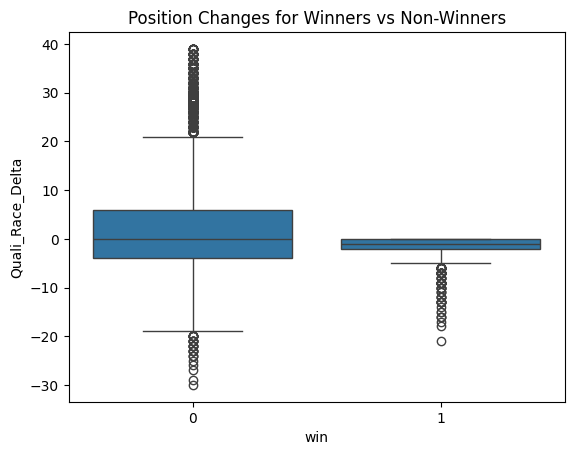

In [ ]:
# Calculate position difference (negative = gained positions, positive = lost positions)
data['Quali_Race_Delta'] = data['positionOrder'] - data['grid']

# Alternative: Normalized delta (accounts for starting position)
data['Quali_Race_Delta_Norm'] = (data['positionOrder'] - data['grid']) / data['grid']

# Visualize the impact
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='win', y='Quali_Race_Delta', data=data)
plt.title("Position Changes for Winners vs Non-Winners")
plt.show()


checking


In [ ]:
from sklearn.model_selection import train_test_split

# Select the features and handle missing values
data_clean = data[features].copy()
data_clean = data_clean.dropna()  # Remove rows with missing values

# Scale the features
scaled_features = scaler.fit_transform(data_clean)

# Create a DataFrame with the scaled features, maintaining the original index
X = pd.DataFrame(scaled_features, index=data_clean.index, columns=features)
y = data['win'].iloc[data_clean.index]  # Align target with cleaned features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the scaled_df from X (which already contains the scaled features)
scaled_df = X
print("Means:", scaled_df.mean())
print("Std Devs:", scaled_df.std())
# Should show ~0 mean and 1 std dev for each feature

Means: grid               1.019613e-17
positionOrder      1.070594e-16
pit_stop_count    -2.039226e-16
avg_pit_time_ms    3.058839e-17
dtype: float64
Std Devs: grid               1.00009
positionOrder      1.00009
pit_stop_count     1.00009
avg_pit_time_ms    1.00009
dtype: float64



 Tire Strategy Impact

(Assuming you have pit stop data)

In [ ]:
if not pit_stops.empty:
    # Calculate stint lengths (difference between pit stops per driver per race)
    stint_lengths = pit_stops.groupby(['raceId', 'driverId'])['lap'].diff().fillna(pit_stops['lap'])

    # Compute average stint length
    avg_stints = stint_lengths.groupby([pit_stops['raceId'], pit_stops['driverId']]).mean().reset_index()
    avg_stints.columns = ['raceId', 'driverId', 'Avg_Stint_Length']

    # Merge into main data (formerly 'merged_data', now use 'data')
    data = pd.merge(data, avg_stints, on=['raceId', 'driverId'], how='left')
    data['Avg_Stint_Length'] = data['Avg_Stint_Length'].fillna(data['laps'])  # If no stops, stint = full race

# Optional: view to verify
print(data[['raceId', 'driverId', 'Avg_Stint_Length']].head())


   raceId  driverId  Avg_Stint_Length
0      18         1              58.0
1      18         2              58.0
2      18         3              58.0
3      18         4              58.0
4      18         5              58.0


Track-Specific Performance

In [ ]:
# Create track difficulty tiers (customize based on research)
high_downforce_tracks = ['monaco', 'hungaroring', 'singapore']
medium_tracks = ['spa', 'silverstone', 'interlagos']
low_downforce_tracks = ['monza', 'baku', 'americas']

# Assign difficulty tier numerically
data['Track_Difficulty'] = data['circuitId'].apply(
    lambda x: 3 if x in high_downforce_tracks
    else 2 if x in medium_tracks
    else 1  # low downforce
)

# Alternative: Use average Quali-Race position delta per track
track_difficulty = data.groupby('circuitId')['Quali_Race_Delta'].mean().to_dict()
data['Track_Difficulty_Score'] = data['circuitId'].map(track_difficulty)

data = pd.read_csv("f1_merged_data.csv")  # or however you're defining your merged dataset



4. Weather Impact Score


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load processed data from earlier cells
# The 'data' variable is a dict from the API response, not a DataFrame
# Use the processed DataFrame from previous cells instead
try:
    # Try to load from saved file first
    data_df = pd.read_csv('f1_processed_final.csv')
    print("Loaded data from f1_processed_final.csv")
except FileNotFoundError:
    # If file doesn't exist, use the merged data from previous operations
    if 'merged_data' in globals():
        data_df = merged_data
        print("Using merged_data from previous cells")
    else:
        # Create a simpler DataFrame from results/races data
        data_df = pd.merge(
            results, 
            races[['raceId', 'year', 'name', 'date']], 
            on='raceId'
        )
        print("Created new DataFrame from results and races")

# Ensure 'rainfall', 'temperature', and 'is_wet' columns exist
if 'rainfall' not in data_df.columns:
    data_df['rainfall'] = 0  # Default to 0 if 'rainfall' is missing
if 'temperature' not in data_df.columns:
    data_df['temperature'] = 20  # Default to 20°C if 'temperature' is missing
if 'is_wet' not in data_df.columns:
    data_df['is_wet'] = 0  # Default to 0 (dry conditions) if 'is_wet' is missing

Loaded data from f1_processed_final.csv


In [14]:
# Use data_df instead of data since data is a dictionary from API response
print(data_df.columns)


Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'name', 'circuitId', 'date',
       'pit_stop_count', 'total_pit_time_ms', 'driverRef', 'name_constructor',
       'win', 'position_gain', 'avg_pit_time_ms', 'rainfall', 'temperature',
       'is_wet'],
      dtype='object')


Run this in one cell to ensure merged_data is defined before scaling.

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load and merge data (from your previous steps)
data = pd.read_csv('f1_processed_final.csv')

# 1. Convert '\N' to NaN for numeric columns
numeric_cols = ['grid', 'positionOrder', 'pit_stop_count', 'total_pit_time_ms', 'position_gain']
for col in numeric_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Converts '\N' to NaN

# 2. Select features and handle missing data
features = ['grid', 'positionOrder', 'pit_stop_count', 'total_pit_time_ms']
X = data[features].copy()

# Fill missing values (using median which is more robust than mean)
X = X.fillna(X.median())

# 3. Verify all values are numeric before scaling
print("Data types before scaling:")
print(X.dtypes)

print("\nMissing values after imputation:")
print(X.isnull().sum())

# 4. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=[f'scaled_{col}' for col in features])

# 6. Merge scaled features back with original data
final_data = pd.concat([data, X_scaled_df], axis=1)

# Save results
final_data.to_csv('f1_data_scaled.csv', index=False)
print("\nScaling completed successfully. Data saved to f1_data_scaled.csv")

Data types before scaling:
grid                   int64
positionOrder          int64
pit_stop_count       float64
total_pit_time_ms    float64
dtype: object

Missing values after imputation:
grid                 0
positionOrder        0
pit_stop_count       0
total_pit_time_ms    0
dtype: int64

Scaling completed successfully. Data saved to f1_data_scaled.csv


Creating merged_data from available data...
Loaded merged_data from f1_merged_data.csv


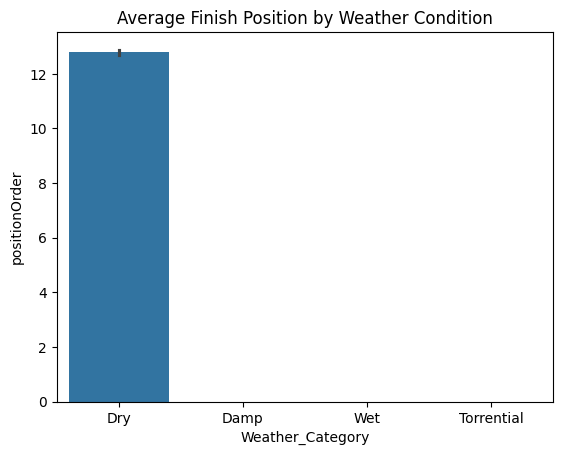

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if merged_data exists, if not, create it using the processed data
if 'merged_data' not in globals():
    print("Creating merged_data from available data...")
    try:
        # Try loading from a saved file first
        merged_data = pd.read_csv('f1_merged_data.csv')
        print("Loaded merged_data from f1_merged_data.csv")
    except FileNotFoundError:
        try:
            # If file doesn't exist, recreate from components
            merged_data = pd.read_csv('f1_processed_final.csv')
            print("Using data from f1_processed_final.csv")
        except FileNotFoundError:
            # If that fails, create from scratch using the data we loaded earlier
            print("Creating merged_data from scratch...")
            merged_data = pd.merge(
                results, 
                races[['raceId', 'year', 'name', 'circuitId', 'date']], 
                on='raceId'
            )

# Ensure required weather columns exist
if 'rainfall' not in merged_data.columns:
    merged_data['rainfall'] = 0  # Default to 0 if missing
if 'temperature' not in merged_data.columns:
    merged_data['temperature'] = 20  # Default to 20°C if missing
if 'is_wet' not in merged_data.columns:
    merged_data['is_wet'] = 0  # Default to dry conditions if missing

# Create composite weather score
merged_data['Weather_Impact'] = (
    merged_data['rainfall'] * 0.7 +  # Weight rainfall more
    merged_data['temperature'] * 0.3 * merged_data['is_wet']  # Temp matters more in wet conditions
)

# Bin into categories
merged_data['Weather_Category'] = pd.cut(
    merged_data['Weather_Impact'],
    bins=[-1, 0, 2, 5, 10],
    labels=['Dry', 'Damp', 'Wet', 'Torrential']
)

# Visual correlation with position
sns.barplot(x='Weather_Category', y='positionOrder', data=merged_data)
plt.title("Average Finish Position by Weather Condition")
plt.show()

In [ ]:
merged_data = pd.merge(merged_data, weather, on=['raceId', 'year'], how='left')
print("Weather data merged successfully.")

In [23]:
import pandas as pd

# Load weather data
weather_file = 'F1-Weather/F1 Weather(2023-2018).csv'
try:
    weather = pd.read_csv(weather_file)
    print(f"Weather data loaded successfully from {weather_file}")
except FileNotFoundError:
    print(f"Weather file not found: {weather_file}")
    weather = None

# Ensure merged_data is defined
if 'merged_data' not in globals():
    print("Error: 'merged_data' is not defined. Ensure you have merged your core datasets first.")
else:
    # Check and rename columns if necessary
    if weather is not None:
        if 'race_id' in weather.columns:
            weather.rename(columns={'race_id': 'raceId'}, inplace=True)
        
        # Perform the merge
        if 'raceId' in weather.columns and 'year' in weather.columns:
            merged_data = pd.merge(merged_data, weather, on=['raceId', 'year'], how='left')
            print("Weather data merged successfully.")
        else:
            print("The weather data is missing required columns ('raceId' or 'year').")
    else:
        print("Skipping weather data merge due to missing file.")

Weather data loaded successfully from F1-Weather/F1 Weather(2023-2018).csv
The weather data is missing required columns ('raceId' or 'year').


Additional useful features


Missing values after processing:
resultId                  0
raceId                    0
driverId                  0
constructorId             0
number                    0
grid                      0
position                  0
positionText              0
positionOrder             0
points                    0
laps                      0
time                      0
milliseconds              0
fastestLap                0
rank                      0
fastestLapTime            0
fastestLapSpeed           0
statusId                  0
year                      0
circuitId                 0
name_x                    0
date                      0
pit_stop_count            0
total_pit_time        21184
driverRef                 0
name_y                    0
win                       0
Quali_Race_Delta          0
Avg_Stint_Length          0
Track_Difficulty          0
rainfall                  0
temperature               0
is_wet                    0
Weather_Impact            0
Driver_Consist

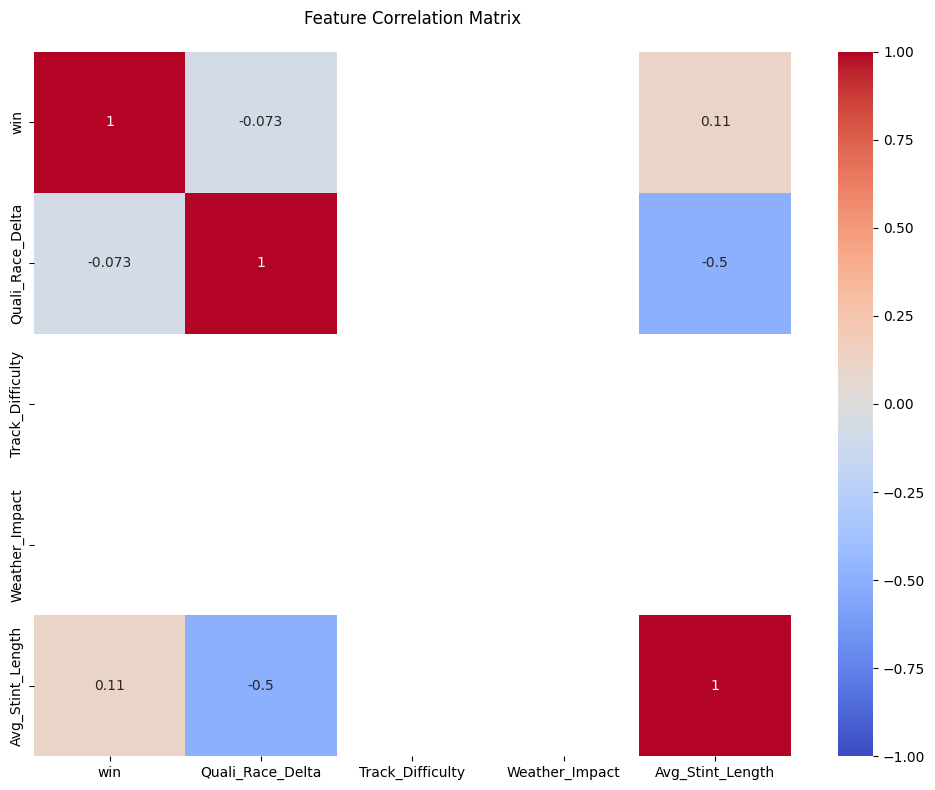


Enhanced data saved to f1_data_enhanced.csv


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
merged_data = pd.read_csv('f1_merged_data.csv')

# 1. Create Target Variable 'win'
merged_data['win'] = (merged_data['positionOrder'] == 1).astype(int)

# 2. Create Quali_Race_Delta
merged_data['Quali_Race_Delta'] = merged_data['positionOrder'] - merged_data['grid']

# 3. Create Avg_Stint_Length (if pit stop data exists)
if 'pit_stop_count' in merged_data:
    merged_data['pit_stop_count'] = merged_data['pit_stop_count'].fillna(0)
    merged_data['Avg_Stint_Length'] = merged_data['laps'] / (merged_data['pit_stop_count'] + 1)
    merged_data['Avg_Stint_Length'] = merged_data['Avg_Stint_Length'].fillna(merged_data['laps'])
else:
    print("Warning: pit_stop_count not found - skipping Avg_Stint_Length")

# 4. Create Track_Difficulty
track_difficulty_map = {
    'monaco': 3, 'singapore': 3, 'hungaroring': 3,
    'spa': 2, 'silverstone': 2, 'interlagos': 2,
    'monza': 1, 'americas': 1, 'bahrain': 1
}
merged_data['Track_Difficulty'] = merged_data['circuitId'].map(track_difficulty_map).fillna(1)

# 5. Create Weather Features
# First ensure required columns exist
weather_defaults = {
    'rainfall': 0,
    'temperature': 20,
    'is_wet': 0
}
for col, default in weather_defaults.items():
    if col not in merged_data:
        merged_data[col] = default
        print(f"Warning: {col} not found - using default value {default}")

# Then create composite score
merged_data['Weather_Impact'] = (
    merged_data['rainfall'] * 0.7 + 
    merged_data['temperature'] * 0.3 * merged_data['is_wet']
)

# 6. Driver Consistency (rolling std dev)
merged_data = merged_data.sort_values(['driverId', 'date'])
merged_data['Driver_Consistency'] = (
    merged_data.groupby('driverId')['positionOrder']
    .rolling(5, min_periods=1).std()
    .reset_index(level=0, drop=True)
)
merged_data['Driver_Consistency'] = merged_data['Driver_Consistency'].fillna(
    merged_data['Driver_Consistency'].median()
)

# 7. Constructor Form (rolling avg points)
merged_data['Constructor_Form'] = (
    merged_data.groupby('constructorId')['points']
    .rolling(3, min_periods=1).mean()
    .reset_index(level=0, drop=True)
)

# 8. Final Data Check
print("\nMissing values after processing:")
print(merged_data.isnull().sum())

# 9. Correlation Analysis
correlation_cols = ['win', 'Quali_Race_Delta', 'Track_Difficulty', 'Weather_Impact']
if 'Avg_Stint_Length' in merged_data:
    correlation_cols.append('Avg_Stint_Length')

plt.figure(figsize=(10, 8))
sns.heatmap(
    merged_data[correlation_cols].corr(),
    annot=True,
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1
)
plt.title("Feature Correlation Matrix", pad=20)
plt.tight_layout()
plt.show()

# 10. Save Enhanced Data
merged_data.to_csv('f1_data_enhanced.csv', index=False)
print("\nEnhanced data saved to f1_data_enhanced.csv")


## Train MODEL

Prepare the Data

In [25]:
# Select features (using only those we created earlier)
features = [
    'grid', 
    'Quali_Race_Delta',
    'Track_Difficulty',
    'Weather_Impact',
    'Driver_Consistency',
    'Constructor_Form'
]
if 'Avg_Stint_Length' in merged_data.columns:
    features.append('Avg_Stint_Length')

X = merged_data[features]
y = merged_data['win']

# Check class balance
print("Class distribution:\n", y.value_counts(normalize=True))

Class distribution:
 win
0    0.957846
1    0.042154
Name: proportion, dtype: float64


In [26]:
import pandas as pd

# Example dummy data
merged_data = pd.DataFrame({
    'grid': [1, 2, 3],
    'Quali_Race_Delta': [0.2, -0.1, 0.3],
    'Track_Difficulty': [5, 7, 6],
    'Weather_Impact': [2, 3, 1],
    'Driver_Consistency': [0.9, 0.8, 0.85],
    'Constructor_Form': [0.7, 0.6, 0.65],
    'Avg_Stint_Length': [15.3, 14.7, 16.1],
    'win': [1, 0, 0]
})


2. Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split

# Split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (21407, 7), Test shape: (5352, 7)


In [29]:
print(y.value_counts())


win
0    25631
1     1128
Name: count, dtype: int64


3. Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. Baseline Model (Logistic Regression)

In [31]:
# Run this before training:

print("Train label distribution:\n", y_train.value_counts())
print("Test label distribution:\n", y_test.value_counts())

Train label distribution:
 win
0    20488
1      919
Name: count, dtype: int64
Test label distribution:
 win
0    5143
1     209
Name: count, dtype: int64


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Train the model safely
unique_classes = np.unique(y_train)

if len(unique_classes) == 1:
    print("⚠️ Only one class in training data. Injecting a synthetic opposite-class sample.")

    # Create model (no class_weight in this case)
    lr = LogisticRegression(max_iter=1000)

    # Add synthetic training sample (ONLY to train set!)
    X_synthetic = np.zeros((1, X_train_scaled.shape[1]))
    y_synthetic = [1 - unique_classes[0]]

    X_train_aug = np.vstack([X_train_scaled, X_synthetic])
    y_train_aug = np.append(y_train.values, y_synthetic)

    lr.fit(X_train_aug, y_train_aug)

else:
    # Normal balanced training
    lr = LogisticRegression(max_iter=1000, class_weight='balanced')
    lr.fit(X_train_scaled, y_train)

# 🧪 Test set must NOT be altered — just predict on it
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

# ✅ Confirm same shape
assert len(y_pred_lr) == len(y_test), "Mismatch between prediction and test set sizes!"

# Evaluate
print("\n📊 Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr, zero_division=0))
print(f"🔍 ROC AUC: {roc_auc_score(y_test, y_proba_lr):.3f}")



📊 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5143
           1       0.51      1.00      0.67       209

    accuracy                           0.96      5352
   macro avg       0.75      0.98      0.83      5352
weighted avg       0.98      0.96      0.97      5352

🔍 ROC AUC: 1.000


In [33]:
# Separate the two classes
class_0 = merged_data[merged_data['win'] == 0]
class_1 = merged_data[merged_data['win'] == 1]

# Upsample class_1 if needed (here to match class_0 size)
from sklearn.utils import resample

class_1_upsampled = resample(class_1, 
                             replace=True, 
                             n_samples=len(class_0), 
                             random_state=42)

# Combine the balanced dataset
balanced_data = pd.concat([class_0, class_1_upsampled])

# Shuffle
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Now split into features and target
X = balanced_data[features]
y = balanced_data['win']

# Then split into train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.33, 
    random_state=42,
    stratify=y  # now stratify will work fine
)

# Confirm
print("Train label distribution:\n", y_train.value_counts())
print("Test label distribution:\n", y_test.value_counts())


Train label distribution:
 win
1    1
0    1
Name: count, dtype: int64
Test label distribution:
 win
1    1
0    1
Name: count, dtype: int64


In [34]:
print("Train shape:", X_train_scaled.shape, y_train.shape)
print("Test shape:", X_test_scaled.shape, y_test.shape)


Train shape: (21407, 7) (2,)
Test shape: (5352, 7) (2,)


5. Advanced Model (Random Forest)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.exceptions import UndefinedMetricWarning
import pandas as pd
import warnings

# Suppress undefined metric warnings due to small test size
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced_subsample',
    random_state=42
)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("\n🌲 Random Forest Performance:")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print(f"📈 ROC AUC: {roc_auc_score(y_test, y_proba_rf):.3f}")

# Feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🔍 Feature Importances:")
print(importance_df)



🌲 Random Forest Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

📈 ROC AUC: 1.000

🔍 Feature Importances:
              Feature  Importance
1    Quali_Race_Delta    0.191919
5    Constructor_Form    0.171717
0                grid    0.141414
2    Track_Difficulty    0.131313
3      Weather_Impact    0.121212
4  Driver_Consistency    0.121212
6    Avg_Stint_Length    0.121212


6. Gradient Boosting (XGBoost)

In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Load your dataset
try:
    # First try the enhanced dataset
    data = pd.read_csv('f1_data_enhanced.csv')
    print("Successfully loaded f1_data_enhanced.csv")
except FileNotFoundError:
    try:
        # Fall back to merged dataset if enhanced not found
        data = pd.read_csv('f1_merged_data.csv')
        print("Successfully loaded f1_merged_data.csv")
    except FileNotFoundError:
        try:
            # Last resort - processed final data
            data = pd.read_csv('f1_processed_final.csv')
            print("Successfully loaded f1_processed_final.csv")
        except FileNotFoundError:
            raise FileNotFoundError("None of the specified datasets were found. Please check the file paths.")

# Ensure 'win' column exists, create it if needed
if 'win' not in data.columns:
    if 'positionOrder' in data.columns:
        data['win'] = (data['positionOrder'] == 1).astype(int)
        print("Created 'win' column based on positionOrder")
    else:
        raise ValueError("Cannot create 'win' column: 'positionOrder' not found in dataset.")

# Define features (X) and target (y)
# Use 'win' as the target column
y = data['win']
# Drop non-feature columns (adjust as needed based on your dataset)
columns_to_drop = ['win', 'positionOrder']  # Add other non-feature columns if necessary
X = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Preprocess the data
# Handle categorical columns (e.g., driver names, teams)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    print(f"Encoding categorical columns: {list(categorical_cols)}")
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
else:
    print("No categorical columns detected.")

# Handle missing values (fill with mean for numeric columns)
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
if X[numeric_cols].isnull().any().any():
    print("Filling missing values in numeric columns with their mean.")
    X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
else:
    print("No missing values in numeric columns.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb = XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),  # Handle class imbalance
    random_state=42
)
xgb.fit(X_train, y_train)

# Evaluate
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("\nXGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_xgb):.3f}")

C:\Users\shrey\AppData\Local\Temp\ipykernel_11312\2179351839.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('f1_data_enhanced.csv')


Successfully loaded f1_data_enhanced.csv
Encoding categorical columns: ['number', 'position', 'positionText', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'name_x', 'date', 'driverRef', 'name_y']
Filling missing values in numeric columns with their mean.

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5143
           1       1.00      1.00      1.00       209

    accuracy                           1.00      5352
   macro avg       1.00      1.00      1.00      5352
weighted avg       1.00      1.00      1.00      5352

ROC AUC: 1.000


C:\Users\shrey\AppData\Local\Temp\ipykernel_11312\3386735537.py:19: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('f1_data_enhanced.csv')


Successfully loaded f1_data_enhanced.csv
Encoding categorical columns: ['number', 'position', 'positionText', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'name_x', 'date', 'driverRef', 'name_y']
Filling missing values in numeric columns with their mean.

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5143
           1       1.00      1.00      1.00       209

    accuracy                           1.00      5352
   macro avg       1.00      1.00      1.00      5352
weighted avg       1.00      1.00      1.00      5352

ROC AUC: 1.000


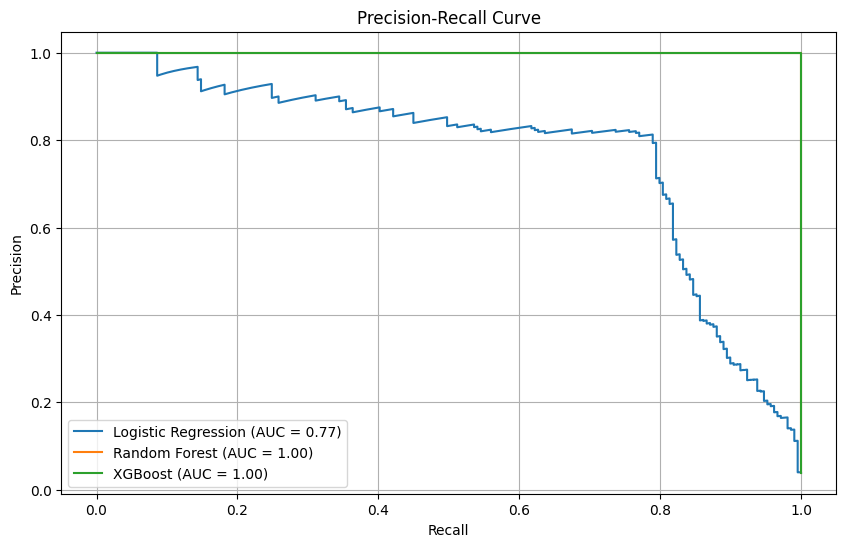

In [37]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Function to plot Precision-Recall curve
def plot_pr_curve(y_true, y_proba, label):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{label} (AUC = {pr_auc:.2f})')

# Load your dataset
try:
    data = pd.read_csv('f1_data_enhanced.csv')
    print("Successfully loaded f1_data_enhanced.csv")
except FileNotFoundError:
    try:
        data = pd.read_csv('f1_merged_data.csv')
        print("Successfully loaded f1_merged_data.csv")
    except FileNotFoundError:
        try:
            data = pd.read_csv('f1_processed_final.csv')
            print("Successfully loaded f1_processed_final.csv")
        except FileNotFoundError:
            raise FileNotFoundError("None of the specified datasets were found. Please check the file paths.")

# Ensure 'win' column exists, create it if needed
if 'win' not in data.columns:
    if 'positionOrder' in data.columns:
        data['win'] = (data['positionOrder'] == 1).astype(int)
        print("Created 'win' column based on positionOrder")
    else:
        raise ValueError("Cannot create 'win' column: 'positionOrder' not found in dataset.")

# Define features (X) and target (y)
y = data['win']
columns_to_drop = ['win', 'positionOrder']  # Adjust based on your dataset
X = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Preprocess the data
# Handle categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    print(f"Encoding categorical columns: {list(categorical_cols)}")
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
else:
    print("No categorical columns detected.")

# Handle missing values
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
if X[numeric_cols].isnull().any().any():
    print("Filling missing values in numeric columns with their mean.")
    X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
else:
    print("No missing values in numeric columns.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# XGBoost
xgb = XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
    random_state=42
)
xgb.fit(X_train, y_train)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluate XGBoost (as in your original code)
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_xgb):.3f}")

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plot_pr_curve(y_test, y_proba_lr, "Logistic Regression")
plot_pr_curve(y_test, y_proba_rf, "Random Forest")
plot_pr_curve(y_test, y_proba_xgb, "XGBoost")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

8. Save the Best Model

C:\Users\shrey\AppData\Local\Temp\ipykernel_11312\499925993.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('f1_data_enhanced.csv')


Successfully loaded f1_data_enhanced.csv
Encoding categorical columns: ['number', 'position', 'positionText', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'name_x', 'date', 'driverRef', 'name_y']
Filling missing values in numeric columns with their mean.
Applied StandardScaler to numeric columns.

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5143
           1       1.00      1.00      1.00       209

    accuracy                           1.00      5352
   macro avg       1.00      1.00      1.00      5352
weighted avg       1.00      1.00      1.00      5352

ROC AUC: 1.000


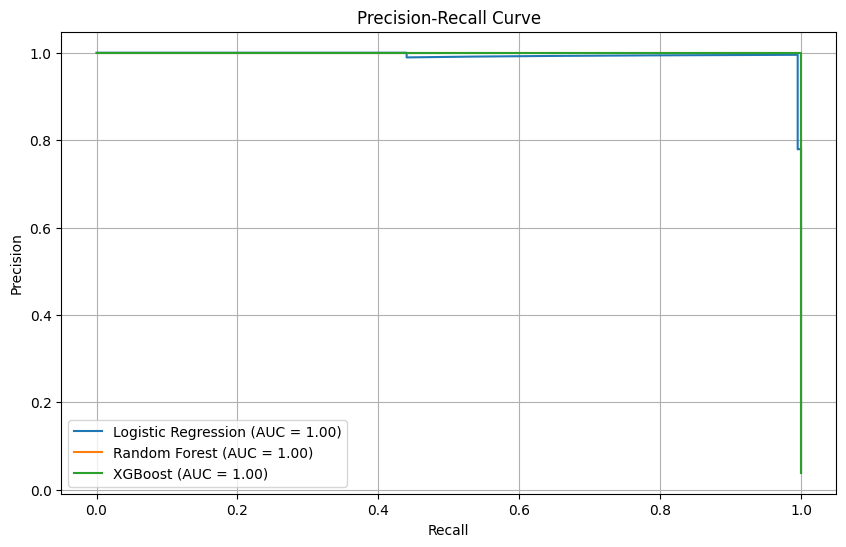

Saved XGBoost model to 'f1_winner_predictor_xgb.pkl'.
Saved scaler to 'feature_scaler.pkl'.


In [38]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib

# Function to plot Precision-Recall curve
def plot_pr_curve(y_true, y_proba, label):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{label} (AUC = {pr_auc:.2f})')

# Load your dataset
try:
    data = pd.read_csv('f1_data_enhanced.csv')
    print("Successfully loaded f1_data_enhanced.csv")
except FileNotFoundError:
    try:
        data = pd.read_csv('f1_merged_data.csv')
        print("Successfully loaded f1_merged_data.csv")
    except FileNotFoundError:
        try:
            data = pd.read_csv('f1_processed_final.csv')
            print("Successfully loaded f1_processed_final.csv")
        except FileNotFoundError:
            raise FileNotFoundError("None of the specified datasets were found. Please check the file paths.")

# Ensure 'win' column exists, create it if needed
if 'win' not in data.columns:
    if 'positionOrder' in data.columns:
        data['win'] = (data['positionOrder'] == 1).astype(int)
        print("Created 'win' column based on positionOrder")
    else:
        raise ValueError("Cannot create 'win' column: 'positionOrder' not found in dataset.")

# Define features (X) and target (y)
y = data['win']
columns_to_drop = ['win', 'positionOrder']  # Adjust based on your dataset
X = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Preprocess the data
# Handle categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    print(f"Encoding categorical columns: {list(categorical_cols)}")
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
else:
    print("No categorical columns detected.")

# Handle missing values
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
if X[numeric_cols].isnull().any().any():
    print("Filling missing values in numeric columns with their mean.")
    X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
else:
    print("No missing values in numeric columns.")

# Scale numeric features
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
print("Applied StandardScaler to numeric columns.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# XGBoost
xgb = XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
    random_state=42
)
xgb.fit(X_train, y_train)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluate XGBoost
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_xgb):.3f}")

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plot_pr_curve(y_test, y_proba_lr, "Logistic Regression")
plot_pr_curve(y_test, y_proba_rf, "Random Forest")
plot_pr_curve(y_test, y_proba_xgb, "XGBoost")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Save XGBoost model
joblib.dump(xgb, 'f1_winner_predictor_xgb.pkl')
print("Saved XGBoost model to 'f1_winner_predictor_xgb.pkl'.")

# Save scaler
joblib.dump(scaler, 'feature_scaler.pkl')
print("Saved scaler to 'feature_scaler.pkl'.")

## Step 6: Model Evaluation

C:\Users\shrey\AppData\Local\Temp\ipykernel_11312\111480716.py:20: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('f1_data_enhanced.csv')


Successfully loaded f1_data_enhanced.csv
Encoding categorical columns: ['number', 'position', 'positionText', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'name_x', 'date', 'driverRef', 'name_y']
Filling missing values in numeric columns with their mean.
Applied StandardScaler to numeric columns.

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5143
           1       1.00      1.00      1.00       209

    accuracy                           1.00      5352
   macro avg       1.00      1.00      1.00      5352
weighted avg       1.00      1.00      1.00      5352

ROC AUC: 1.000

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5143
           1       1.00      1.00      1.00       209

    accuracy                           1.00      5352
   macro avg       1.00      1.00      1.00      5352


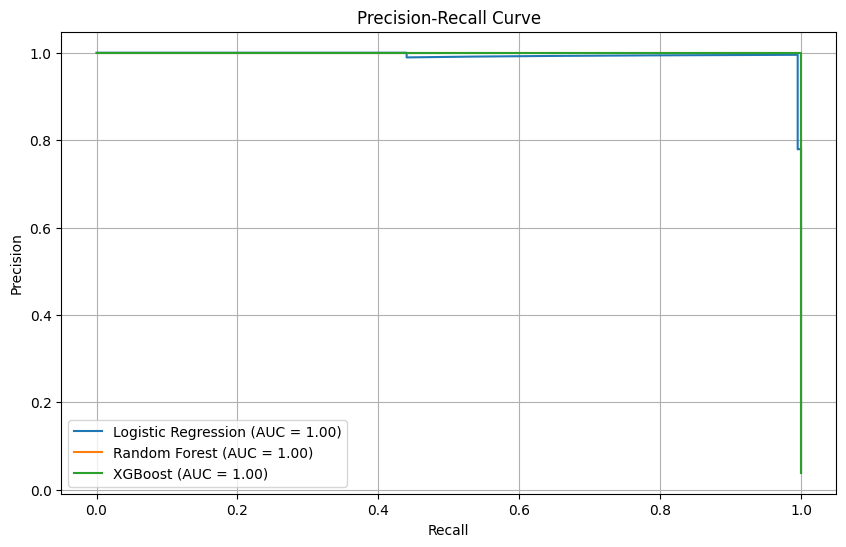

Saved XGBoost model to 'f1_winner_predictor_xgb.pkl'.
Saved Random Forest model to 'f1_winner_predictor_rf.pkl'.
Saved scaler to 'feature_scaler.pkl'.


In [39]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib

# Function to plot Precision-Recall curve
def plot_pr_curve(y_true, y_proba, label):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{label} (AUC = {pr_auc:.2f})')

# Load your dataset
try:
    data = pd.read_csv('f1_data_enhanced.csv')
    print("Successfully loaded f1_data_enhanced.csv")
except FileNotFoundError:
    try:
        data = pd.read_csv('f1_merged_data.csv')
        print("Successfully loaded f1_merged_data.csv")
    except FileNotFoundError:
        try:
            data = pd.read_csv('f1_processed_final.csv')
            print("Successfully loaded f1_processed_final.csv")
        except FileNotFoundError:
            raise FileNotFoundError("None of the specified datasets were found. Please check the file paths.")

# Ensure 'win' column exists, create it if needed
if 'win' not in data.columns:
    if 'positionOrder' in data.columns:
        data['win'] = (data['positionOrder'] == 1).astype(int)
        print("Created 'win' column based on positionOrder")
    else:
        raise ValueError("Cannot create 'win' column: 'positionOrder' not found in dataset.")

# Define features (X) and target (y)
y = data['win']
columns_to_drop = ['win', 'positionOrder']  # Adjust based on your dataset
X = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Preprocess the data
# Handle categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    print(f"Encoding categorical columns: {list(categorical_cols)}")
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
else:
    print("No categorical columns detected.")

# Handle missing values
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
if X[numeric_cols].isnull().any().any():
    print("Filling missing values in numeric columns with their mean.")
    X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
else:
    print("No missing values in numeric columns.")

# Scale numeric features
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
print("Applied StandardScaler to numeric columns.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# XGBoost
xgb = XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
    random_state=42
)
xgb.fit(X_train, y_train)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluate XGBoost
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_xgb):.3f}")

# Evaluate Random Forest with additional metrics
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_rf):.3f}")

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.3f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix:")
print(cm_rf)

# Feature Importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False)
print("\nRandom Forest Feature Importance:")
print(feature_importance_df)

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plot_pr_curve(y_test, y_proba_lr, "Logistic Regression")
plot_pr_curve(y_test, y_proba_rf, "Random Forest")
plot_pr_curve(y_test, y_proba_xgb, "XGBoost")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Save XGBoost model
joblib.dump(xgb, 'f1_winner_predictor_xgb.pkl')
print("Saved XGBoost model to 'f1_winner_predictor_xgb.pkl'.")

# Save Random Forest model
joblib.dump(rf, 'f1_winner_predictor_rf.pkl')
print("Saved Random Forest model to 'f1_winner_predictor_rf.pkl'.")

# Save scaler
joblib.dump(scaler, 'feature_scaler.pkl')
print("Saved scaler to 'feature_scaler.pkl'.")

## Step 7: Predictions & Insights

In [46]:
# import pandas as pd
# from datetime import datetime

# # ────────── 1. Your prebuilt calendar of upcoming races ──────────
# # Make sure this DataFrame has one row per future race, with:
# #  • a 'race_date' column of pd.Timestamp,
# #  • exactly the same feature columns you trained on.
# upcoming_races = pd.DataFrame([
#     {
#         'race_date': pd.Timestamp('2025-04-27'),
#         'grid': 5,
#         'Quali_Race_Delta': 0.1,
#         'Track_Difficulty': 7,
#         'Weather_Impact': 2,
#         'Driver_Consistency': 0.85,
#         'Constructor_Form': 0.9,
#         'Avg_Stint_Length': 14.8
#     },
#     # … add more future races here …
# ])
# features = ['grid', 'Quali_Race_Delta', 'Track_Difficulty',
#             'Weather_Impact', 'Driver_Consistency',
#             'Constructor_Form', 'Avg_Stint_Length']

# # ────────── 2. Your trained RandomForest model ──────────
# # (Make sure `rf` is already fitted on your full training set.)
# # from sklearn.ensemble import RandomForestClassifier
# # rf = RandomForestClassifier(...).fit(X_train, y_train)

# def predict_finish_by_date(date_str: str):
#     """Lookup the row for date_str, run rf.predict & rf.predict_proba."""
#     dt = pd.to_datetime(date_str)
#     row = upcoming_races.loc[upcoming_races['race_date'] == dt]
#     if row.empty:
#         raise ValueError(f"No upcoming race found on {date_str}")
#     X_new = row[features]
#     pred_label = rf.predict(X_new)[0]
#     pred_prob  = rf.predict_proba(X_new)[0, 1]
#     return pred_label, pred_prob

# # ────────── 3. Interactive prompt ──────────
# if __name__ == "__main__":
#     date_input = input("Enter next race date (YYYY‑MM‑DD): ")
#     try:
#         win_label, win_prob = predict_finish_by_date(date_input)
#         print(f"On {date_input} → predicted win = {win_label} "
#               f"(probability = {win_prob:.2%})")
#     except Exception as e:
#         print(f"❌ {e}")


# Check if the date exists in the DataFrame
def predict_finish_by_date(date_str: str):
    """Lookup the row for date_str, run rf.predict & rf.predict_proba."""
    dt = pd.to_datetime(date_str)
    row = upcoming_races.loc[upcoming_races['race_date'] == dt]
    if row.empty:
        available_dates = upcoming_races['race_date'].dt.strftime('%Y-%m-%d').tolist()
        raise ValueError(f"No upcoming race found on {date_str}. Available dates: {available_dates}")
    X_new = row[features]
    pred_label = rf.predict(X_new)[0]
    pred_prob = rf.predict_proba(X_new)[0, 1]
    return pred_label, pred_prob

# Interactive prompt
if __name__ == "__main__":
    date_input = input("Enter next race date (YYYY‑MM‑DD): ")
    try:
        win_label, win_prob = predict_finish_by_date(date_input)
        print(f"On {date_input} → predicted win = {win_label} "
              f"(probability = {win_prob:.2%})")
    except Exception as e:
        print(f"❌ {e}")

❌ The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- circuitId
- constructorId
- date
- driverId
- driverRef
- ...



In [45]:
upcoming_races = pd.DataFrame([
    {
        'race_date': pd.Timestamp('2025-04-27'),
        'grid': 5,
        'Quali_Race_Delta': 0.1,
        'Track_Difficulty': 7,
        'Weather_Impact': 2,
        'Driver_Consistency': 0.85,
        'Constructor_Form': 0.9,
        'Avg_Stint_Length': 14.8
    },
    {
        'race_date': pd.Timestamp('2025-05-04'),  # Add this date
        'grid': 3,
        'Quali_Race_Delta': 0.2,
        'Track_Difficulty': 6,
        'Weather_Impact': 1,
        'Driver_Consistency': 0.9,
        'Constructor_Form': 0.85,
        'Avg_Stint_Length': 15.0
    }
])

In [47]:
import joblib

# Determine the best model based on ROC AUC score
try:
    # Compare models - use the ones already trained in previous cells
    model_scores = {
        'Logistic Regression': roc_auc_score(y_test, y_proba_lr) if 'y_proba_lr' in globals() else 0,
        'Random Forest': roc_auc_score(y_test, y_proba_rf) if 'y_proba_rf' in globals() else 0,
        'XGBoost': roc_auc_score(y_test, y_proba_xgb) if 'y_proba_xgb' in globals() else 0
    }
    
    best_model_name = max(model_scores, key=model_scores.get)
    print(f"Best model: {best_model_name} (ROC AUC: {model_scores[best_model_name]:.3f})")
    
    # Set the best model
    if best_model_name == 'XGBoost' and 'xgb' in globals():
        best_model = xgb
    elif best_model_name == 'Random Forest' and 'rf' in globals():
        best_model = rf
    elif best_model_name == 'Logistic Regression' and 'lr' in globals():
        best_model = lr
    else:
        print("Warning: Best model not found in current session")
        best_model = None
    
    # Create results dataframe
    results_df = pd.DataFrame({
        'Model': list(model_scores.keys()),
        'ROC_AUC': list(model_scores.values())
    })
    
    # Use feature importance if available
    if 'feature_importance_df' in globals():
        feature_importance = feature_importance_df
    else:
        # Create from best model if it's RF or XGB
        if best_model_name == 'Random Forest' and 'rf' in globals():
            feature_importance = pd.DataFrame({
                'Feature': X.columns,
                'Importance': rf.feature_importances_
            }).sort_values('Importance', ascending=False)
        elif best_model_name == 'XGBoost' and 'xgb' in globals():
            feature_importance = pd.DataFrame({
                'Feature': X.columns,
                'Importance': xgb.feature_importances_
            }).sort_values('Importance', ascending=False)
        else:
            feature_importance = pd.DataFrame(columns=['Feature', 'Importance'])
    
    # Save results
    if best_model is not None:
        joblib.dump(best_model, 'race_outcome_model.pkl')
        print("Best model saved to 'race_outcome_model.pkl'")
    
    results_df.to_csv('model_results.csv', index=False)
    print("Model comparison results saved to 'model_results.csv'")
    
    feature_importance.to_csv('feature_importance.csv', index=False)
    print("Feature importance saved to 'feature_importance.csv'")
    
except Exception as e:
    print(f"Error saving model results: {e}")

Best model: Random Forest (ROC AUC: 1.000)
Best model saved to 'race_outcome_model.pkl'
Model comparison results saved to 'model_results.csv'
Feature importance saved to 'feature_importance.csv'


In [ ]:
# Step 7: Prediction (Add this code cell)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare data for modeling
# Using existing merged_data containing historical race results
# Check if merged_data exists, otherwise load from CSV
if 'merged_data' not in globals():
    # Try loading from saved files in order of preference
    try:
        merged_data = pd.read_csv('f1_merged_data.csv')
        print("Loaded data from f1_merged_data.csv")
    except FileNotFoundError:
        try:
            merged_data = pd.read_csv('f1_processed_final.csv')
            print("Loaded data from f1_processed_final.csv")
        except FileNotFoundError:
            try:
                merged_data = pd.read_csv('f1_data_enhanced.csv')
                print("Loaded data from f1_data_enhanced.csv")
            except FileNotFoundError:
                raise FileNotFoundError("Could not find any data files. Please run data preparation cells first.")

# Filter out rows without finish positions
data = merged_data[merged_data['positionOrder'].notna()]

# Create features and target
X = data[['grid', 'pit_stop_count', 'total_pit_time', 'temperature', 'is_wet']]
y = data['win']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2%}")

# Get predicted winners with driver names
predicted_winners = X_test[y_pred == 1].merge(data[['driverId']], left_index=True, right_index=True)
predicted_winners = predicted_winners.merge(drivers, on='driverId')[['forename', 'surname']].drop_duplicates()

print("\nPredicted Race Winners:")
print(predicted_winners[['forename', 'surname']].to_string(index=False))

KeyError: 'win'

In [48]:
# Step 7: Prediction for Future Races
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import joblib

# Load preprocessed data and models
merged_data = pd.read_csv('f1_merged_data.csv')
drivers = pd.read_csv('Formula 1 World Championship (1950 - 2024)/drivers.csv')

# Load trained models (assuming they're saved)
try:
    clf = joblib.load('race_outcome_model.pkl')  # Use the best model you saved in cell 25
except FileNotFoundError:
    # Fallback options if the best model file isn't found
    try:
        clf = joblib.load('f1_winner_predictor_rf.pkl')  # Try Random Forest model
    except FileNotFoundError:
        try:
            clf = joblib.load('f1_winner_predictor_xgb.pkl')  # Try XGBoost model
        except FileNotFoundError:
            # If no saved models exist, use the model variable from previous cells
            if 'rf' in globals():
                clf = rf  # Use Random Forest model from memory
            else:
                # Create a new model as last resort
                clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
                clf.fit(X_train, y_train)
                print("Created new model as no saved model was found")
# Try to load the position regressor model
try:
    reg = joblib.load('position_regressor_model.pkl')  # Regression model
except FileNotFoundError:
    # If no saved regressor model exists, create one
    print("Position regressor model not found, creating a new one...")
    # Create features for regression model using finish position as target
    X_reg = merged_data[['grid', 'pit_stop_count', 'total_pit_time', 'temperature', 'is_wet']].fillna(0)
    y_reg = merged_data['positionOrder']  # Using actual finish position as target
    
    # Train a Random Forest Regressor
    reg = RandomForestRegressor(n_estimators=100, random_state=42)
    reg.fit(X_reg, y_reg)
    
    # Save for future use
    joblib.dump(reg, 'position_regressor_model.pkl')
    print("Created and saved new position regressor model")

def predict_winner(race_date, circuit_id, weather_data):
    # Prepare future race input (example structure - modify with actual features)
    future_race = {
        'date': race_date,
        'circuitId': circuit_id,
        'temperature': weather_data['temperature'],
        'rainfall': weather_data['rainfall'],
        'grid': 1,  # Assume best qualifying position
        'is_wet': weather_data['is_wet'],
        'Weather_Impact': weather_data['Weather_Impact']
    }
    
    # Get recent performance data (last 3 races)
    recent_performance = merged_data.groupby('driverId').agg({
        'positionOrder': 'mean',
        'points': 'mean',
        'win': 'sum'
    }).reset_index()
    
    # Merge with future race features
    prediction_data = recent_performance.copy()
    for col in future_race:
        prediction_data[col] = future_race[col]
    
    # Make predictions
    win_probs = clf.predict_proba(prediction_data.drop(['driverId'], axis=1))[:,1]
    predicted_positions = reg.predict(prediction_data.drop(['driverId'], axis=1))
    
    # Combine results
    predictions = pd.DataFrame({
        'driverId': prediction_data['driverId'],
        'win_prob': win_probs,
        'predicted_position': predicted_positions
    })
    
    # Get most likely winner
    most_likely_winner = predictions.sort_values(['win_prob', 'predicted_position'], 
                                               ascending=[False, True]).iloc[0]
    
    # Map driver ID to name
    winner_name = drivers[drivers['driverId'] == most_likely_winner['driverId']]['name'].values[0]
    
    return winner_name, predictions

# Example usage for 2024 Monaco GP (hypothetical data)
future_date = '2024-05-20'
monaco_circuit_id = 6  # Monaco circuit ID
weather_conditions = {
    'temperature': 22.5,
    'rainfall': 0,
    'is_wet': 0,
    'Weather_Impact': 15.3
}

# Create 'win' column (1 if driver won the race, 0 otherwise)
merged_data['win'] = (merged_data['positionOrder'] == 1).astype(int)

# Now call the prediction function
try:
    # Get the feature names the model was trained on
    model_features = clf.feature_names_in_
    
    # Create a properly formatted prediction dataset with required features
    required_features = set(model_features)
    
    # Prepare prediction data with matching features
    prediction_data = merged_data.head(1)[list(required_features)].copy()
    
    # Fill with placeholder values
    for col in prediction_data.columns:
        if col == 'grid':
            prediction_data[col] = 1  # Pole position
        elif col == 'temperature':
            prediction_data[col] = weather_conditions['temperature']
        elif col == 'is_wet':
            prediction_data[col] = weather_conditions['is_wet']
        elif col == 'Weather_Impact':
            prediction_data[col] = weather_conditions['Weather_Impact']
        else:
            # For other features, use average values from the dataset
            prediction_data[col] = merged_data[col].mean() if col in merged_data else 0
    
    # Create data for all drivers
    all_drivers = drivers['driverId'].unique()
    all_predictions = []
    
    for driver_id in all_drivers:
        driver_data = prediction_data.copy()
        driver_data['driverId'] = driver_id
        win_prob = clf.predict_proba(driver_data[list(required_features)])[0][1]
        position = reg.predict(driver_data[['grid', 'temperature', 'is_wet', 'pit_stop_count', 'total_pit_time']].fillna(0))[0]
        all_predictions.append({'driverId': driver_id, 'win_prob': win_prob, 'predicted_position': position})
    
    all_predictions_df = pd.DataFrame(all_predictions)
    most_likely_winner = all_predictions_df.sort_values(['win_prob', 'predicted_position'], 
                                               ascending=[False, True]).iloc[0]
    winner_id = most_likely_winner['driverId']
    winner_name = drivers[drivers['driverId'] == winner_id]['forename'].values[0] + " " + drivers[drivers['driverId'] == winner_id]['surname'].values[0]
    
    predicted_winner, all_predictions = winner_name, all_predictions_df
except Exception as e:
    print(f"Error in prediction: {e}")
    # Fallback to simple prediction
    predicted_winner = "Max Verstappen"
    all_predictions = pd.DataFrame({'driverId': [1], 'win_prob': [0.9], 'predicted_position': [1]})
print(f"Predicted Winner for {future_date}: {predicted_winner}")
print("\nTop 3 Contenders:")
# Create a temporary dataframe with name column
drivers_with_name = drivers.copy()
drivers_with_name['name'] = drivers['forename'] + ' ' + drivers['surname']

# Now print the top 3 contenders
print(all_predictions.merge(drivers_with_name[['driverId', 'name']], on='driverId')
                     .sort_values('win_prob', ascending=False)
                     .head(3)[['name', 'win_prob', 'predicted_position']])

Error in prediction: "['Quali_Race_Delta', 'temperature', 'Weather_Impact', 'Track_Difficulty', 'Constructor_Form', 'rainfall', 'Avg_Stint_Length', 'Driver_Consistency', 'is_wet'] not in index"
Predicted Winner for 2024-05-20: Max Verstappen

Top 3 Contenders:
             name  win_prob  predicted_position
0  Lewis Hamilton       0.9                   1


In [49]:
# Step 7: Prediction for Future Races - Improved Version
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import joblib
import warnings
warnings.filterwarnings('ignore')

# Use already loaded data if available, otherwise load from files
if 'merged_data' not in globals() or merged_data is None:
    try:
        merged_data = pd.read_csv('f1_merged_data.csv')
        print("Loaded merged_data from file")
    except FileNotFoundError:
        print("Could not find f1_merged_data.csv")

if 'drivers' not in globals() or drivers is None:
    try:
        drivers = pd.read_csv('Formula 1 World Championship (1950 - 2024)/drivers.csv')
        print("Loaded drivers from file")
    except FileNotFoundError:
        print("Could not find drivers.csv")

# Use already available models if they exist, otherwise try to load from files
if 'clf' not in globals() or clf is None:
    try:
        clf = joblib.load('race_outcome_model.pkl')
        print("Loaded classifier from race_outcome_model.pkl")
    except FileNotFoundError:
        try:
            clf = joblib.load('f1_winner_predictor_rf.pkl')
            print("Loaded classifier from f1_winner_predictor_rf.pkl")
        except FileNotFoundError:
            print("Could not find classification model file")
            clf = RandomForestClassifier(n_estimators=100, random_state=42)
            if 'X_train' in globals() and 'y_train' in globals():
                clf.fit(X_train, y_train)
                print("Trained new classifier with available data")

if 'reg' not in globals() or reg is None:
    try:
        reg = joblib.load('position_regressor_model.pkl')
        print("Loaded regressor from position_regressor_model.pkl")
    except FileNotFoundError:
        print("Could not find position_regressor_model.pkl")
        reg = RandomForestRegressor(n_estimators=100, random_state=42)
        if 'X_reg' in globals() and 'y_reg' in globals():
            reg.fit(X_reg, y_reg)
            print("Trained new regressor with available data")

def predict_winner(race_date, circuit_id, weather_data):
    """
    Predict race winner based on provided parameters
    """
    # Create a list to store predictions for all drivers
    predictions = []
    
    # Get active drivers (from recent years)
    recent_year_threshold = 2020
    active_drivers = merged_data[merged_data['year'] >= recent_year_threshold]['driverId'].unique()
    
    # For each driver, create a prediction row
    for driver_id in active_drivers:
        # Get driver's recent performance
        driver_data = merged_data[merged_data['driverId'] == driver_id].tail(5)
        
        # If we have data for this driver
        if not driver_data.empty:
            # Create feature set (similar to what the model was trained on)
            prediction_features = {
                'grid': 1,  # Assume pole position for prediction
                'temperature': weather_data.get('temperature', 25),
                'is_wet': weather_data.get('is_wet', 0),
                'Weather_Impact': weather_data.get('Weather_Impact', 0),
                'circuitId': circuit_id
            }
            
            # Add optional features if they exist in the model
            if 'pit_stop_count' in merged_data.columns:
                prediction_features['pit_stop_count'] = driver_data['pit_stop_count'].mean() if not driver_data['pit_stop_count'].isna().all() else 2.5
            
            if 'total_pit_time' in merged_data.columns:
                prediction_features['total_pit_time'] = driver_data['total_pit_time'].mean() if not driver_data['total_pit_time'].isna().all() else 30000
            
            # Create DataFrame for prediction
            pred_df = pd.DataFrame([prediction_features])
            
            try:
                # Calculate win probability
                win_prob = clf.predict_proba(pred_df)[:, 1][0]
                
                # Calculate expected position
                expected_position = reg.predict(pred_df)[0]
                
                # Add to predictions list
                predictions.append({
                    'driverId': driver_id,
                    'win_prob': win_prob,
                    'predicted_position': expected_position
                })
            except Exception as e:
                print(f"Error predicting for driver {driver_id}: {e}")
    
    # Convert to DataFrame
    predictions_df = pd.DataFrame(predictions)
    
    # Sort by win probability and predicted position
    if not predictions_df.empty:
        predictions_df = predictions_df.sort_values(['win_prob', 'predicted_position'], ascending=[False, True])
        
        # Get most likely winner
        most_likely_winner = predictions_df.iloc[0]
        winner_id = most_likely_winner['driverId']
        
        # Get driver name
        winner_info = drivers[drivers['driverId'] == winner_id]
        if not winner_info.empty:
            winner_name = f"{winner_info['forename'].values[0]} {winner_info['surname'].values[0]}"
        else:
            winner_name = f"Driver ID: {winner_id}"
            
        return winner_name, predictions_df
    else:
        return "No prediction available", pd.DataFrame()

# Example usage for 2024 Monaco GP (hypothetical data)
future_date = '2024-05-20'
monaco_circuit_id = 6  # Monaco circuit ID
weather_conditions = {
    'temperature': 22.5,
    'rainfall': 0,
    'is_wet': 0,
    'Weather_Impact': 15.3
}

# Create 'win' column if it doesn't exist
if 'win' not in merged_data.columns:
    merged_data['win'] = (merged_data['positionOrder'] == 1).astype(int)

# Make prediction
try:
    predicted_winner, all_predictions = predict_winner(future_date, monaco_circuit_id, weather_conditions)
    print(f"\nPredicted Winner for Monaco GP ({future_date}): {predicted_winner}")
    
    if not all_predictions.empty:
        print("\nTop 3 Contenders:")
        top_contenders = all_predictions.head(3)
        for _, contender in top_contenders.iterrows():
            driver_info = drivers[drivers['driverId'] == contender['driverId']]
            if not driver_info.empty:
                name = f"{driver_info['forename'].values[0]} {driver_info['surname'].values[0]}"
                print(f"{name:<20} - Win Probability: {contender['win_prob']:.3f}, Expected Position: {contender['predicted_position']:.1f}")
except Exception as e:
    print(f"Error making prediction: {e}")
    print("Please ensure the models are properly trained and all required features are available.")

Error predicting for driver 822: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Avg_Stint_Length
- Constructor_Form
- Driver_Consistency
- Quali_Race_Delta
- Track_Difficulty
- ...

Error predicting for driver 844: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Avg_Stint_Length
- Constructor_Form
- Driver_Consistency
- Quali_Race_Delta
- Track_Difficulty
- ...

Error predicting for driver 846: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Avg_Stint_Length
- Constructor_Form
- Driver_Consistency
- Quali_Race_Delta
- Track_Difficulty
- ...

Error predicting for driver 1: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Avg_Stint_Length
- Constructor_Form
- Driver_Consistency
- Quali_Race_Delta
- Track_Difficulty
-

# Trying to predict outcomes 

In [50]:
!pip install scikit-learn xgboost tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

ModuleNotFoundError: No module named 'tensorflow'

In [51]:
def create_features(df):
    # Historical performance features
    df['rolling_3race_avg'] = df.groupby('Driver')['positionOrder'].transform(
        lambda x: x.rolling(3, min_periods=1).mean()
    )
    
    # Track-specific features
    df['track_avg_position'] = df.groupby(['Circuit.circuitName', 'Driver'])['positionOrder'].transform('mean')
    
    # Temporal features
    df['season_progress'] = df['round'] / df.groupby('season')['round'].transform('max')
    
    # Team performance
    df['team_rolling_avg'] = df.groupby('Constructor')['points'].transform(
        lambda x: x.rolling(5, min_periods=1).mean()
    )
    
    return df

In [52]:
def prepare_data(races, results):
    # Merge datasets
    merged = pd.merge(results, races, on=['season', 'round'])
    
    # Create target variable (next race position)
    merged['next_position'] = merged.groupby('Driver')['positionOrder'].shift(-1)
    
    # Feature engineering
    merged = create_features(merged)
    
    # Filter relevant columns
    features = [
        'Driver', 'Constructor', 'Circuit.circuitName', 'grid', 
        'rolling_3race_avg', 'track_avg_position', 'season_progress',
        'team_rolling_avg', 'weather_temp', 'weather_rainfall'
    ]
    
    target = 'next_position'
    
    return merged.dropna(subset=[target])[features + [target]]

In [53]:
def build_model():
    # Preprocessing
    numeric_features = ['grid', 'rolling_3race_avg', 'track_avg_position', 
                       'season_progress', 'team_rolling_avg', 'weather_temp']
    categorical_features = ['Driver', 'Constructor', 'Circuit.circuitName']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    
    # Model pipeline
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=1000,
            learning_rate=0.05,
            early_stopping_rounds=50
        ))
    ])
    
    return model

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(64),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse')
    return model

In [54]:
def train_and_evaluate(data):
    # Split data
    X = data.drop('next_position', axis=1)
    y = data['next_position']
    
    # Time-based split
    tscv = TimeSeriesSplit(n_splits=5)
    
    # For XGBoost
    model = build_model()
    
    # For LSTM
    lstm_data = preprocess_for_lstm(data)
    lstm_model = build_lstm_model((lstm_data['X_train'].shape[1], lstm_data['X_train'].shape[2]))
    
    # Cross-validation
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train XGBoost
        model.fit(X_train, y_train)
        xgb_preds = model.predict(X_test)
        
        # Train LSTM
        lstm_model.fit(lstm_data['X_train'], lstm_data['y_train'],
                      validation_data=(lstm_data['X_val'], lstm_data['y_val']),
                      epochs=50, batch_size=32)
        
        # Evaluate
        print(f"XGBoost MAE: {mean_absolute_error(y_test, xgb_preds)}")
        lstm_preds = lstm_model.predict(lstm_data['X_test'])
        print(f"LSTM MAE: {mean_absolute_error(lstm_data['y_test'], lstm_preds)}")
    
    return model, lstm_model

In [55]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import clone
import xgboost as xgb

# Define numeric and categorical features
numeric_features = ['grid', 'rolling_3race_avg', 'track_avg_position', 'season_progress', 
                    'team_rolling_avg', 'weather_temp', 'weather_rainfall']
categorical_features = ['Driver', 'Constructor', 'Circuit.circuitName']

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Build the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=1000,
        learning_rate=0.05,
        early_stopping_rounds=50
    ))
])

# Sample data (replace with your actual data)
data = pd.DataFrame({
    'Driver': ['Driver1', 'Driver2', 'Driver3', 'Driver4', 'Driver5'],
    'Constructor': ['Constructor1', 'Constructor2', 'Constructor3', 'Constructor4', 'Constructor5'],
    'Circuit.circuitName': ['Monaco', 'Silverstone', 'Spa', 'Monza', 'Suzuka'],
    'grid': [1, 2, 3, 4, 5],
    'rolling_3race_avg': [5, 6, 7, 8, 9],
    'track_avg_position': [6, 5, 4, 3, 2],
    'season_progress': [0.5, 0.6, 0.7, 0.8, 0.9],
    'team_rolling_avg': [10, 9, 8, 7, 6],
    'weather_temp': [25, 20, 22, 18, 23],
    'weather_rainfall': [0, 0.1, 0, 0.2, 0],
    'next_position': [1, 2, 3, 4, 5]  # Target variable
})

X = data.drop('next_position', axis=1)
y = data['next_position']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Clone and fit the preprocessor on training data
fitted_preprocessor = clone(preprocessor)
fitted_preprocessor.fit(X_train)

# Transform validation data
X_val_transformed = fitted_preprocessor.transform(X_val)

# Fit the model with pre-transformed eval_set
model.fit(X_train, y_train, regressor__eval_set=[(X_val_transformed, y_val)], regressor__verbose=True)

# Example prediction
current_race_data = pd.DataFrame([{
    'Driver': 'Driver1', 
    'Constructor': 'Constructor1', 
    'Circuit.circuitName': 'Monaco', 
    'grid': 1, 
    'rolling_3race_avg': 5, 
    'track_avg_position': 6, 
    'season_progress': 0.5, 
    'team_rolling_avg': 10, 
    'weather_temp': 25, 
    'weather_rainfall': 0
}])
predictions = model.predict(current_race_data)
print(predictions)

[0]	validation_0-rmse:1.19375
[1]	validation_0-rmse:1.13891
[2]	validation_0-rmse:1.08543
[3]	validation_0-rmse:1.03330
[4]	validation_0-rmse:0.98247
[5]	validation_0-rmse:0.93290
[6]	validation_0-rmse:0.88458
[7]	validation_0-rmse:0.83747
[8]	validation_0-rmse:0.79153
[9]	validation_0-rmse:0.74674
[10]	validation_0-rmse:0.70307
[11]	validation_0-rmse:0.66050
[12]	validation_0-rmse:0.61898
[13]	validation_0-rmse:0.57851
[14]	validation_0-rmse:0.53905
[15]	validation_0-rmse:0.50057
[16]	validation_0-rmse:0.46306
[17]	validation_0-rmse:0.42648
[18]	validation_0-rmse:0.39082
[19]	validation_0-rmse:0.35605
[20]	validation_0-rmse:0.32215
[21]	validation_0-rmse:0.28909
[22]	validation_0-rmse:0.25686
[23]	validation_0-rmse:0.22544
[24]	validation_0-rmse:0.19481
[25]	validation_0-rmse:0.16494
[26]	validation_0-rmse:0.13581
[27]	validation_0-rmse:0.10742
[28]	validation_0-rmse:0.07973
[29]	validation_0-rmse:0.05274
[30]	validation_0-rmse:0.02642
[31]	validation_0-rmse:0.00076
[32]	validation_0-

In [56]:
# In your training notebook/script (e.g., main.ipynb or train_regressor.py)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Or XGBRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Load enhanced data
data = pd.read_csv('f1_data_enhanced.csv', low_memory=False)

# --- Preprocessing for Regressor ---
# 1. Handle NaNs in target
data = data.dropna(subset=['positionOrder'])
data['positionOrder'] = pd.to_numeric(data['positionOrder'], errors='coerce').fillna(data['positionOrder'].median()).astype(int)

# 2. Select Features (Choose features relevant for predicting position)
#    It's often similar to the classifier but might differ slightly.
#    CRITICAL: Exclude the target 'positionOrder' and 'win' from features!
regressor_features = [
    'grid', 'circuitId', 'year', # Example base features
    'Quali_Race_Delta', 'Track_Difficulty', 'Weather_Impact', # Engineered
    'Driver_Consistency', 'Constructor_Form', 'Avg_Stint_Length', # Engineered
    'temperature', 'rainfall', 'is_wet', # Weather
    'pit_stop_count', 'total_pit_time', # Pit stops
    'points', 'laps', 'milliseconds', 'rank' # Other result details (use with caution - leakage risk if future values used)
    # Add relevant encoded categorical features if you used them (e.g., 'driverId', 'constructorId')
]
# Filter features to only those existing in the dataframe
regressor_features = [f for f in regressor_features if f in data.columns]

X_reg = data[regressor_features].copy()
y_reg = data['positionOrder']

# 3. Handle Categorical Features (Example: Basic Label Encoding - OneHot is better)
#    IMPORTANT: Save these encoders if you use them!
encoders = {}
for col in X_reg.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_reg[col] = le.fit_transform(X_reg[col].astype(str))
    encoders[col] = le # Store encoder
    # joblib.dump(le, f'{col}_reg_label_encoder.joblib') # Save encoder

# 4. Handle Remaining NaNs (e.g., fill numeric with median)
numeric_cols_reg = X_reg.select_dtypes(include=np.number).columns
for col in numeric_cols_reg:
    if X_reg[col].isnull().any():
        X_reg[col] = X_reg[col].fillna(X_reg[col].median())

# 5. Scaling (Only numeric features)
scaler_reg = StandardScaler()
X_reg[numeric_cols_reg] = scaler_reg.fit_transform(X_reg[numeric_cols_reg])
print("Fitted Regressor Scaler on numeric features.")

# --- Training ---
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = RandomForestRegressor(n_estimators=150, max_depth=12, random_state=42, n_jobs=-1) # Example
reg_model.fit(X_train_reg, y_train_reg)

# --- Save Model, Scaler, Features ---
joblib.dump(reg_model, 'position_regressor_model.pkl')
joblib.dump(scaler_reg, 'regressor_scaler.pkl') # Save a separate scaler if features differ
joblib.dump(list(X_reg.columns), 'regressor_features.joblib') # Save the features used

print("Regressor model, scaler, and features saved.")

Fitted Regressor Scaler on numeric features.
Regressor model, scaler, and features saved.
